## Data Prep

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_mapping = {
    "skai": "skillfulai-historical-data.csv",
    "neos": "neos-ai-historical-data.csv",
    "fakt": "medifakt-historical-data.csv",
    "mcc": "meshchain-ai-historical-data.csv",
    "trust": "trust-protocol-ai-historical-data.csv",
    "vrx": "verox-historical-data.csv",
    "vt": "vtrading-historical-data.csv",
    "allin": "all-in-historical-data.csv",
    "virtual": "virtual-protocol-historical-data.csv",
    "mode": "mode-l-2-historical-data.csv",
    "hq": "hyperquant-2-historical-data.csv",
    "uos": "universal-operating-system-historical-data.csv",
    "aos": "ai-dao-network-historical-data.csv",
    "qtlx": "quantlytica-historical-data.csv",
    "crtai": "crtai-network-historical-data.csv",
    "tenet": "tenet-protocol-historical-data.csv",
    "black": "black-panther-historical-data.csv",
    "soldex": "solana-historical-data.csv",
    "aptr": "aperture-finance-historical-data.csv",
}

dataframes = {}

for token, filename in file_mapping.items():
    try:
        dataframes[token] = pd.read_csv(filename, index_col=0, parse_dates=True)
        print(f"Successfully loaded {filename}")
    except FileNotFoundError:
        print(f"File not found: {filename}")

Successfully loaded skillfulai-historical-data.csv
Successfully loaded neos-ai-historical-data.csv
Successfully loaded medifakt-historical-data.csv
Successfully loaded meshchain-ai-historical-data.csv
Successfully loaded trust-protocol-ai-historical-data.csv
Successfully loaded verox-historical-data.csv
Successfully loaded vtrading-historical-data.csv
Successfully loaded all-in-historical-data.csv
Successfully loaded virtual-protocol-historical-data.csv
Successfully loaded mode-l-2-historical-data.csv
Successfully loaded hyperquant-2-historical-data.csv
Successfully loaded universal-operating-system-historical-data.csv
Successfully loaded ai-dao-network-historical-data.csv
Successfully loaded quantlytica-historical-data.csv
Successfully loaded crtai-network-historical-data.csv
Successfully loaded tenet-protocol-historical-data.csv
Successfully loaded black-panther-historical-data.csv
Successfully loaded solana-historical-data.csv
Successfully loaded aperture-finance-historical-data.csv

In [3]:
# Linear Interpolation for unsuccessful tokens with missing daily price data (sfuel, blos, gaj)
unsuc_tokens = {
    "sfuel": "sparkpoint-fuel-historical-data.csv",
    "blos": "blockpad-historical-data.csv",
    "gaj": "gaj-finance-historical-data.csv",
    "mar3": "mar-3-ai-historical-data.csv",
    "aisc": "ai-surf-historical-data.csv",
    "byn":"beyond-finance-historical-data.csv",
    "build":"beyond-finance-historical-data.csv"
}

date_range = pd.date_range(start="2024-09-13", end="2025-01-13", freq="D")
interpolated_data = pd.DataFrame(index=date_range)

for token, filename in unsuc_tokens.items():
    try:
        df = pd.read_csv(filename, index_col=0, parse_dates=True)
        df.index = pd.to_datetime(df.index)
        df = df[['Close']]
        df['Close'] = df['Close'].replace('[\$,]', '', regex=True).astype(float)
        df = df.reindex(date_range)
        # If there is data before 2024-09-13, use forward fill (ffill) and backward fill (bfill)
        if df.index.min() < pd.to_datetime("2024-09-13"):
            df['Close'] = df['Close'].ffill().bfill()  # try forward fill first, then backward fill
        else:
            # If there is no data before 2024-09-13, manually fill in a reasonable initial value
            df['Close'] = df['Close'].fillna(df['Close'].mean())  # Fill with the mean value
        # Interpolate
        df['Close'] = df['Close'].interpolate(method='linear')
        interpolated_data[token] = df['Close']
        print(f"Successfully interpolated data for {token}")
    except FileNotFoundError:
        print(f"File not found: {filename}")

Successfully interpolated data for sfuel
Successfully interpolated data for blos
Successfully interpolated data for gaj
Successfully interpolated data for mar3
Successfully interpolated data for aisc
Successfully interpolated data for byn
Successfully interpolated data for build


In [4]:
import pandas as pd
import numpy as np

max_supply = {
    "skai": 1000, "neos": 100, "fakt": 999, "mcc": 1000, "trust": 960, "vrx": 0.0475, 
    "vt": 1000, "allin": 1, "virtual": 1000, "mode": 10000, "hq": 21, "uos": 1000, 
    "aos": 10000, "qtlx": 100, "crtai": 1000, "tenet": 1200, "black": 800, 
    "soldex": 500, "aptr": 1000,}

max_supply_unsuc = {"sfuel": 150, "blos": 10, "gaj": 2.1, "mar3": 2000, "aisc": 100, "byn": 100, "build": 10,}

df_list = []

for token, supply in max_supply.items():
    if token in dataframes:
        try:
            temp_df = dataframes[token][['Close']].replace(r'[^\d.]+', '', regex=True)
            temp_df['Close'] = pd.to_numeric(temp_df['Close'], errors='coerce')
            temp_df = temp_df * supply
            temp_df = temp_df.rename(columns={'Close': token})
            df_list.append(temp_df)
        except Exception as e:
            print(f"Error processing {token}: {e}")

for token, supply in max_supply_unsuc.items():
    if token in interpolated_data:
        try:
            temp_df = interpolated_data[token]
            temp_df = pd.to_numeric(temp_df, errors='coerce')
            temp_df = temp_df * supply
            df_list.append(temp_df)
        except Exception as e:
            print(f"Error processing {token}: {e}")

df = pd.concat(df_list, axis=1).dropna()

df

skai  neos     fakt   mcc   trust       vrx    vt  allin  virtual  \
2024-09-13  47.2  4.72  47.1528  47.2  45.312  0.852150  16.3  0.404     30.7   
2024-09-14  45.9  4.59  45.8541  45.9  44.064  0.814625  16.2  0.394     29.9   
2024-09-15  44.9  4.49  44.8551  44.9  43.104  0.795625  16.2  0.390     28.5   
2024-09-16  54.3  5.43  54.2457  54.3  52.128  0.794200  16.3  0.416     28.1   
2024-09-17  53.0  5.30  52.9470  53.0  50.880  0.849775  16.1  0.436     31.2   
...          ...   ...      ...   ...     ...       ...   ...    ...      ...   
2025-01-09  41.2  4.12  41.1588  41.2  39.552  0.342475  13.1  0.420   3110.0   
2025-01-10  42.6  4.26  42.5574  42.6  40.896  0.445550  12.4  0.422   3150.0   
2025-01-11  42.4  4.24  42.3576  42.4  40.704  0.470725  11.9  0.410   3000.0   
2025-01-12  39.8  3.98  39.7602  39.8  38.208  0.400900  11.2  0.427   2690.0   
2025-01-13  39.9  3.99  39.8601  39.9  38.304  0.424650  10.7  0.386   2640.0   

             mode  ...  black   soldex  aptr     sfuel      blos       gaj  \
2024-09-13  116.0  ...  7.064  69440.0  5.30  0.052350  0.052011  0.010448   
2024-09-14  116.0  ...  6.800  68610.0  4.84  0.051000  0.052011  0.010448   
2024-09-15  115.0  ...  6.800  65775.0  4.95  0.050850  0.052011  0.010448   
2024-09-16  111.0  ...  6.392  65895.0  4.57  0.049800  0.052011  0.010448   
2024-09-17  111.0  ...  6.768  65740.0  4.58  0.050550  0.052011  0.010448   
...           ...  ...    ...      ...   ...       ...       ...       ...   
2025-01-09  356.0  ...  8.480  92415.0  7.70  0.008055  0.052011  0.010448   
2025-01-10  371.0  ...  8.480  93825.0  7.82  0.007980  0.052011  0.010448   
2025-01-11  386.0  ...  8.400  94085.0  7.51  0.007995  0.052011  0.010448   
2025-01-12  410.0  ...  8.080  94225.0  7.72  0.077949  0.052011  0.010448   
2025-01-13  383.0  ...  7.760  91425.0  8.22  0.077949  0.052011  0.010448   

              mar3    aisc    byn   build  
2024-09-13  0.3660  0.2970  0.106  0.0106  
2024-09-14  0.3900  0.2850  0.107  0.0107  
2024-09-15  0.4180  0.2720  0.107  0.0107  
2024-09-16  0.3600  0.2600  0.108  0.0108  
2024-09-17  0.3800  0.2630  0.107  0.0107  
...            ...     ...    ...     ...  
2025-01-09  0.1734  0.0823  0.108  0.0108  
2025-01-10  0.1818  0.0825  0.107  0.0107  
2025-01-11  0.1814  0.0824  0.108  0.0108  
2025-01-12  0.1756  0.0795  0.106  0.0106  
2025-01-13  0.1784  0.0796  0.103  0.0103  

[123 rows x 26 columns]

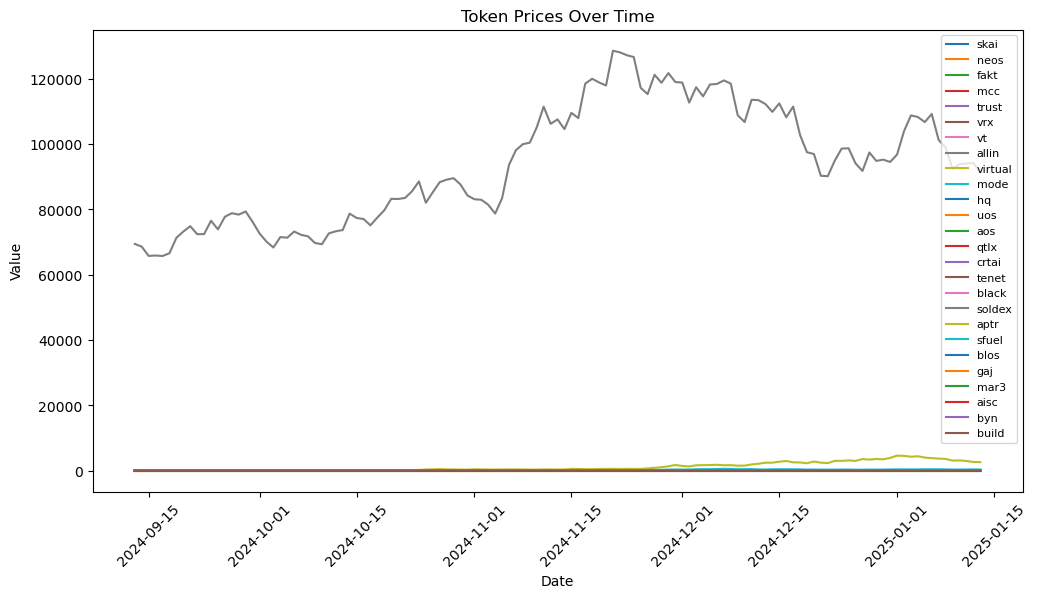

In [5]:
plt.figure(figsize=(12, 6))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Token Prices Over Time")
plt.legend(loc="best", fontsize=8)
 
plt.xticks(rotation=45)
plt.show()

# SOLDEX is an outlier, we will eliminate it

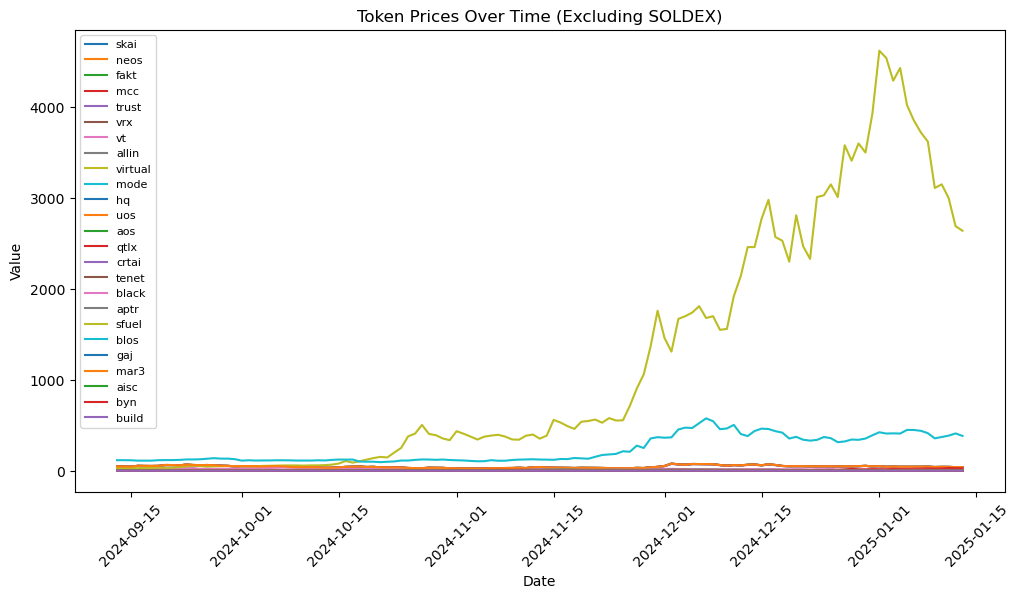

In [6]:
plt.figure(figsize=(12, 6))

df_filtered = df.drop(columns=['soldex'], errors='ignore')

for column in df_filtered.columns:
    plt.plot(df_filtered.index, df_filtered[column], label=column)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Token Prices Over Time (Excluding SOLDEX)")
plt.legend(loc="best", fontsize=8) 

plt.xticks(rotation=45)
plt.show()


# VIRTUAL is an outlier for AI Agent, we will eliminate it

In [7]:
usdt = pd.read_csv('tether-historical-data.csv', index_col = 0, parse_dates = True)
usdt_volume = usdt[['Volume']].replace(r'[\$,]', '', regex=True).astype(float)
df = df.merge(usdt_volume, left_index=True, right_index=True, how='left')

df

skai  neos     fakt   mcc   trust       vrx    vt  allin  virtual  \
2024-09-13  47.2  4.72  47.1528  47.2  45.312  0.852150  16.3  0.404     30.7   
2024-09-14  45.9  4.59  45.8541  45.9  44.064  0.814625  16.2  0.394     29.9   
2024-09-15  44.9  4.49  44.8551  44.9  43.104  0.795625  16.2  0.390     28.5   
2024-09-16  54.3  5.43  54.2457  54.3  52.128  0.794200  16.3  0.416     28.1   
2024-09-17  53.0  5.30  52.9470  53.0  50.880  0.849775  16.1  0.436     31.2   
...          ...   ...      ...   ...     ...       ...   ...    ...      ...   
2025-01-09  41.2  4.12  41.1588  41.2  39.552  0.342475  13.1  0.420   3110.0   
2025-01-10  42.6  4.26  42.5574  42.6  40.896  0.445550  12.4  0.422   3150.0   
2025-01-11  42.4  4.24  42.3576  42.4  40.704  0.470725  11.9  0.410   3000.0   
2025-01-12  39.8  3.98  39.7602  39.8  38.208  0.400900  11.2  0.427   2690.0   
2025-01-13  39.9  3.99  39.8601  39.9  38.304  0.424650  10.7  0.386   2640.0   

             mode  ...   soldex  aptr     sfuel      blos       gaj    mar3  \
2024-09-13  116.0  ...  69440.0  5.30  0.052350  0.052011  0.010448  0.3660   
2024-09-14  116.0  ...  68610.0  4.84  0.051000  0.052011  0.010448  0.3900   
2024-09-15  115.0  ...  65775.0  4.95  0.050850  0.052011  0.010448  0.4180   
2024-09-16  111.0  ...  65895.0  4.57  0.049800  0.052011  0.010448  0.3600   
2024-09-17  111.0  ...  65740.0  4.58  0.050550  0.052011  0.010448  0.3800   
...           ...  ...      ...   ...       ...       ...       ...     ...   
2025-01-09  356.0  ...  92415.0  7.70  0.008055  0.052011  0.010448  0.1734   
2025-01-10  371.0  ...  93825.0  7.82  0.007980  0.052011  0.010448  0.1818   
2025-01-11  386.0  ...  94085.0  7.51  0.007995  0.052011  0.010448  0.1814   
2025-01-12  410.0  ...  94225.0  7.72  0.077949  0.052011  0.010448  0.1756   
2025-01-13  383.0  ...  91425.0  8.22  0.077949  0.052011  0.010448  0.1784   

              aisc    byn   build        Volume  
2024-09-13  0.2970  0.106  0.0106  2.368942e+10  
2024-09-14  0.2850  0.107  0.0107  1.557461e+10  
2024-09-15  0.2720  0.107  0.0107  1.611551e+10  
2024-09-16  0.2600  0.108  0.0108  2.284210e+10  
2024-09-17  0.2630  0.107  0.0107  2.361699e+10  
...            ...    ...     ...           ...  
2025-01-09  0.0823  0.108  0.0108  4.717593e+10  
2025-01-10  0.0825  0.107  0.0107  4.687617e+10  
2025-01-11  0.0824  0.108  0.0108  2.593459e+10  
2025-01-12  0.0795  0.106  0.0106  2.288407e+10  
2025-01-13  0.0796  0.103  0.0103  5.939157e+10  

[123 rows x 27 columns]

In [8]:
ai_agents = {"skai", "neos", "fakt", "mcc", "trust", "vrx", "vt", "allin", "mode", "hq", "aos", "qtlx", "crtai", "mar3", "aisc", "build"}
defi_tokens = {"uos", "tenet", "black", "aptr", "blos", "gaj", "byn", "sfuel"}
unsuc = {"mar3", "aisc", "build", "blos", "gaj", "byn", "sfuel"}

def compute_sigma_value(tokens, df, unsuc, weight_ratio):
    std_over_mean_normal = []
    std_over_mean_unsuc = []
    means_normal = []
    means_unsuc = []

    normal_tokens = tokens - unsuc
    
    for token in normal_tokens:
        if token in df.columns:
            mean_val = df[token].mean()
            std_val = df[token].std()
            
            if mean_val != 0: 
                std_over_mean_normal.append(std_val / mean_val)
            means_normal.append(mean_val)

    for token in unsuc:
        if token in df.columns:
            mean_val = df[token].mean()
            std_val = df[token].std()

            if mean_val != 0: 
                std_over_mean_unsuc.append(std_val / mean_val)
            means_unsuc.append(mean_val)

    # normal token: sigma & value
    sigma_normal = sum(std_over_mean_normal) / len(std_over_mean_normal) if std_over_mean_normal else 0
    value_normal = sum(means_normal) / len(means_normal) if means_normal else 0

    # unsuccessful token: sigma & value
    sigma_unsuc = sum(std_over_mean_unsuc) / len(std_over_mean_unsuc) if std_over_mean_unsuc else 0
    value_unsuc = sum(means_unsuc) / len(means_unsuc) if means_unsuc else 0

    # weighted sigma & value
    sigma_adjusted = (sigma_normal + weight_ratio * sigma_unsuc) / (1 + weight_ratio)
    value_adjusted = (value_normal + weight_ratio * value_unsuc) / (1 + weight_ratio)

    return sigma_adjusted, value_adjusted

In [9]:
def compute_w_scenarios(df, unsuc_tokens, all_tokens):
    """
    Compute the weight W for unsuccessful tokens, incorporating:
    - Historical volatility
    - Risk premium (Risk Premium)
    - Maximum drawdown (Max Drawdown)

    :param df: DataFrame containing historical price data of all tokens
    :param unsuc_tokens: List of unsuccessful tokens
    :param all_tokens: List of all market tokens (ai_agents + defi_tokens)
    :return: (optimistic_W, neutral_W, pessimistic_W)
    """
    # **Convert set to list**
    unsuc_tokens = list(unsuc_tokens)
    all_tokens = list(all_tokens)

    # Compute daily returns for unsuccessful tokens and the overall market
    returns_unsuc = df[unsuc_tokens].pct_change()
    returns_market = df[all_tokens].pct_change()

    # Compute annualized volatility for unsuccessful tokens
    sigma_unsuc = returns_unsuc.std().mean() * np.sqrt(252)
    sigma_market = returns_market.std().mean() * np.sqrt(252)

    # **Compute risk premium (Risk Premium)**
    if sigma_market > 0:
        risk_premium = np.log(1 + sigma_unsuc / sigma_market)  # Apply log transformation to smooth data
    else:
        risk_premium = 0

    # **Compute market maximum drawdown (Max Drawdown)**
    market_prices = df[all_tokens].mean(axis=1)  # Compute market average price
    peak = market_prices.cummax()  # Compute historical peak
    drawdown = (peak - market_prices) / peak  # Compute drawdown percentage
    max_drawdown = drawdown.max()  # Extract maximum drawdown value

    # **Compute W under different market scenarios**
    neutral_w = risk_premium  # Baseline market risk level

    # Pessimistic W: Greater impact of unsuccessful tokens during extreme market conditions
    pessimistic_w = neutral_w * (1 + max_drawdown)

    # Optimistic W: Lower impact of unsuccessful tokens in favorable market conditions
    optimistic_w = neutral_w * (1 - max_drawdown)

    # **Ensure W does not drop below 0**
    optimistic_w = max(optimistic_w, 0)
    neutral_w = max(neutral_w, 0)
    pessimistic_w = max(pessimistic_w, 0)

    return optimistic_w, neutral_w, pessimistic_w

def normalize_w_minmax(optimistic_w, neutral_w, pessimistic_w, min_val=0.1, max_val=0.5):
    """
    Normalize W to the range [0.1, 0.5], preserving market information while preventing excessive impact.
    """
    W_values = np.array([optimistic_w, neutral_w, pessimistic_w])
    
    # Compute Min-Max range
    W_min, W_max = W_values.min(), W_values.max()

    # Prevent division by zero
    if W_max - W_min == 0:
        return min_val, (min_val + max_val) / 2, max_val  # Fallback to ensure distinction

    # Min-Max normalization to [min_val, max_val]
    W_normalized = min_val + (W_values - W_min) * (max_val - min_val) / (W_max - W_min)
    
    return tuple(W_normalized)

# **Compute W based on market conditions**
optimistic_W, neutral_W, pessimistic_W = compute_w_scenarios(df, list(unsuc), list(ai_agents | defi_tokens))

print(f"Optimistic W: {optimistic_W:.2f}")
print(f"Neutral W: {neutral_W:.2f}")
print(f"Pessimistic W: {pessimistic_W:.2f}")

# **Apply Min-Max normalization to scale W to [0.1, 0.5]**
optimistic_W, neutral_W, pessimistic_W = normalize_w_minmax(optimistic_W, neutral_W, pessimistic_W)

print(f"\nNormalized Optimistic W: {optimistic_W:.2f}")
print(f"Normalized Neutral W: {neutral_W:.2f}")
print(f"Normalized Pessimistic W: {pessimistic_W:.2f}")

Optimistic W: 0.67
Neutral W: 1.30
Pessimistic W: 1.94

Normalized Optimistic W: 0.10
Normalized Neutral W: 0.30
Normalized Pessimistic W: 0.50


In [10]:
# Annualizing these change rates can reflect changes in market demand for stability
annualized_mcap_change = usdt['MCap Chg'].mean()
volatility_volume = usdt['Vol Chg'].std()
print(annualized_mcap_change)
print(volatility_volume)

# Define target normalized range
new_min, new_max = 1, 1.1

# Calculate the minimum and maximum values ​​in the original data
original_min = usdt['Vol Chg'].min()
original_max = usdt['Vol Chg'].max()

# Apply normalization formula
usdt['Normalized_Vol'] = new_min + (usdt['Vol Chg'] - original_min) * (new_max - new_min) / (original_max - original_min)

volatility_volume = usdt['Normalized_Vol'].mean()
print("Normalized Volatility:")
print(volatility_volume)

# Define target normalized range
new_min, new_max = 1, 1.1

# Calculate the minimum and maximum values ​​in the original data
original_min = usdt['MCap Chg'].min()
original_max = usdt['MCap Chg'].max()

# Apply normalization formula
usdt['Normalized_Growth'] = new_min + (usdt['MCap Chg'] - original_min) * (new_max - new_min) / (original_max - original_min)

annualized_mcap_change = usdt['Normalized_Growth'].mean()
print("Normalized Growth Rate:")
print(annualized_mcap_change)



0.09647489913366336
36.413848604319945
Normalized Volatility:
1.0208515170355086
Normalized Growth Rate:
1.0140258501527535


In [11]:
# Define scenarios with different market conditions
scenarios = {
    'Bullish': {'volatility_multiplier': volatility_volume*0.5, 'growth_rate_multiplier': annualized_mcap_change*1.05},
    'Neutral': {'volatility_multiplier': 1, 'growth_rate_multiplier': 1},
    'Bearish': {'volatility_multiplier': volatility_volume*1.25, 'growth_rate_multiplier': annualized_mcap_change*0.75}
}


# For Presentation

*******

# AIAgents

### ***Optimistic*** performance (price) scenarios & ***bullish*** market:

In [12]:
# Define price scenarios under different performances
weight_for_unsuc = 0.1
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.382166, value: 31.261727
DeFi (defi) - sigma: 0.324729, value: 15.025110


In [13]:
# Define the scenario-specific parameters
volatility_multiplier = scenarios['Bullish']['volatility_multiplier']
growth_rate_multiplier = scenarios['Bullish']['growth_rate_multiplier']


Percentage of FDV simulations exceeding 100 million on day 100: 96.80%
Scenario: Very Optimistic
  Day 100 Mean FDV: 121.19
  Day 100 - 5th Percentile: 102.09
  Day 100 - 95th Percentile: 141.61



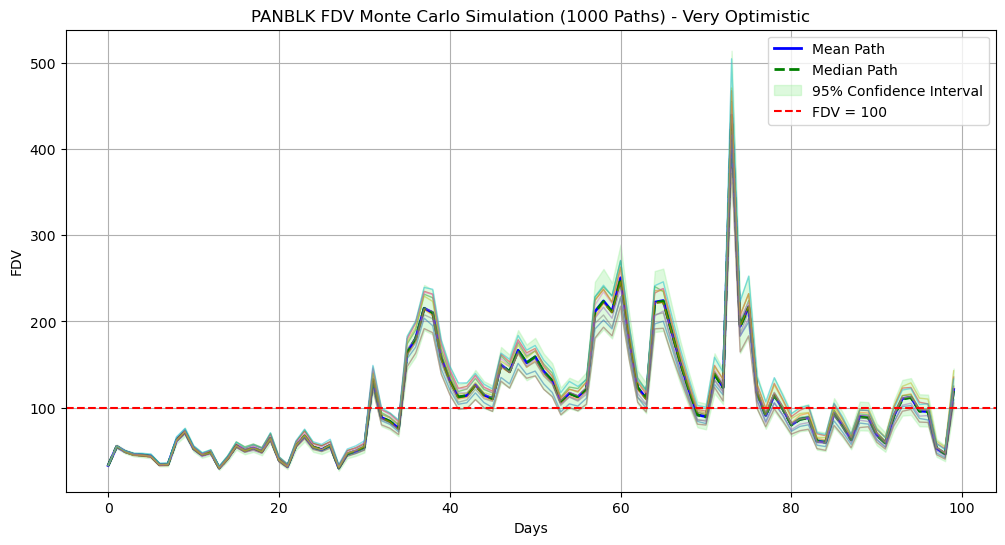

In [14]:
# Parameter Settings
# ====================
T_half = 101       # Transition period (days)
#initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
np.random.seed(42)  # Fix random seed for reproducibility
paths = np.zeros((num_simulations, days))
#paths[:, 0] = initial_FDV

for sim in range(num_simulations):
    for day in range(1, days):
        t = day - 1  # Current time index

        # Retrieve current parameters
        sigma = get_sigma(t)
        curr_value = get_value(t)
        next_value = get_value(t+1)

        # Convert annualized volatility to daily volatility
        sigma_daily = sigma / np.sqrt(365)

        # Compute volatility term
        z = np.random.normal()
        drift = sigma_daily * z - 0.5 * sigma_daily**2

        # Update FDV
        volume_ratio = usdt_volume[day] / usdt_volume[day-1]
        value_ratio = next_value / curr_value
        paths[:, 0] = curr_value * np.exp(drift)
        paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

# ====================
# Result Analysis
# ====================
# Compute statistics
mean_path = np.mean(paths, axis=0)
median_path = np.median(paths, axis=0)
std_dev = np.std(paths, axis=0)

# Compute percentage of simulations above 100 on day 100
above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(mean_path, 'b', lw=2, label='Mean Path')
plt.plot(median_path, 'g--', lw=2, label='Median Path')
#plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

# Confidence level
pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

# Day 100 specific stats
day_100_values = paths[:, -1]
day_100_mean = np.mean(day_100_values)
day_100_p5 = np.percentile(day_100_values, 5)
day_100_p95 = np.percentile(day_100_values, 95)

plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

print(f"Scenario: Very Optimistic")
print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")


# Plot sample paths
for i in range(10):  # Plot first 10 paths
    plt.plot(paths[i], lw=1, alpha=0.5)

# Add horizontal line at 100
plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - Very Optimistic')
plt.xlabel('Days')
plt.ylabel('FDV')
plt.legend()
plt.grid(True)
plt.show()

# We did not incorporate DeFi part into PANBLK valuation

1% quantile:  30.39
5% quantile:  34.24
10% quantile: 45.28
90% quantile: 195.33
100 is at the 55.00th percentile in the median distribution.


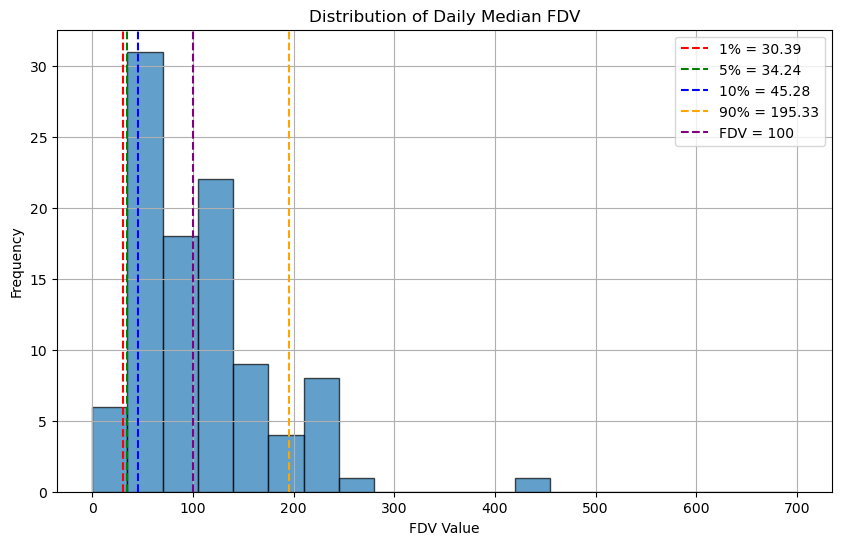

In [15]:
from scipy.stats import percentileofscore

# 1. Calculate quantiles (1%, 5%, 10%), (90%)
pct1 = np.percentile(median_path, 1)
pct5 = np.percentile(median_path, 5)
pct10 = np.percentile(median_path, 10)
pct90 = np.percentile(median_path, 90)

# 2. Find the percentile rank of 100 in median_path
quantile_100 = percentileofscore(median_path, 100)

# Print out the quantiles and percentile rank
print(f"1% quantile:  {pct1:.2f}")
print(f"5% quantile:  {pct5:.2f}")
print(f"10% quantile: {pct10:.2f}")
print(f"90% quantile: {pct90:.2f}")
print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

# 3. Plot the histogram of median_path
bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
plt.figure(figsize=(10, 6))
plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
plt.title("Distribution of Daily Median FDV")
plt.xlabel("FDV Value")
plt.ylabel("Frequency")

# 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

# 5. Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

### ***Pessimistic*** performance (price) scenarios & ***bearish*** market:

In [16]:
# Define price scenarios under different performances
weight_for_unsuc = 0.5
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.522144, value: 22.957448
DeFi (defi) - sigma: 0.480023, value: 11.050595


In [17]:
# Define the scenario-specific parameters
volatility_multiplier = scenarios['Bearish']['volatility_multiplier']
growth_rate_multiplier = scenarios['Bearish']['growth_rate_multiplier']


Percentage of FDV simulations exceeding 100 million on day 100: 7.10%
Scenario: Very Pessimistic
  Day 100 Mean FDV: 63.90
  Day 100 - 5th Percentile: 33.72
  Day 100 - 95th Percentile: 105.31



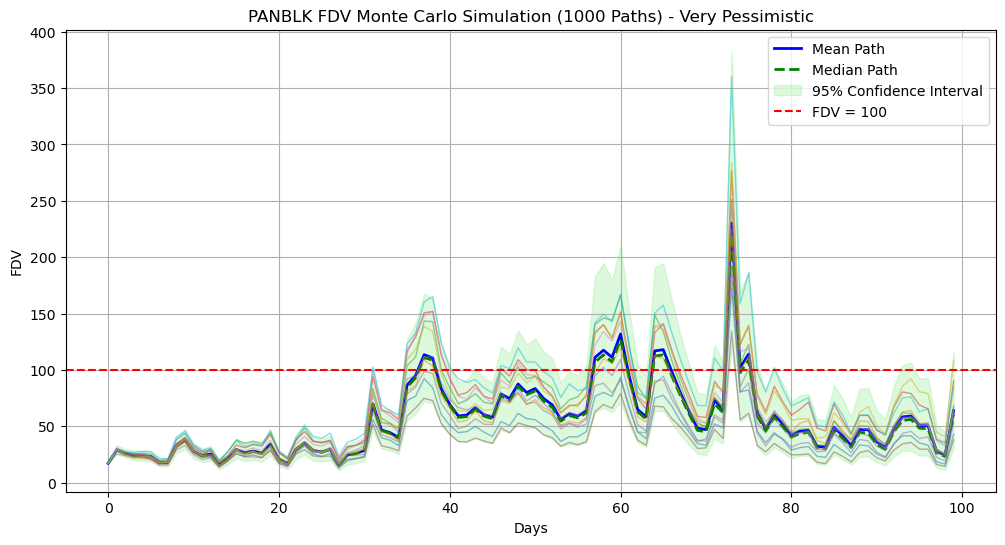

In [18]:
# Parameter Settings
# ====================
T_half = 101       # Transition period (days)
#initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
np.random.seed(42)  # Fix random seed for reproducibility
paths = np.zeros((num_simulations, days))
#paths[:, 0] = initial_FDV


for sim in range(num_simulations):
    for day in range(1, days):
        t = day - 1  # Current time index

        # Retrieve current parameters
        sigma = get_sigma(t)
        curr_value = get_value(t)
        next_value = get_value(t+1)

        # Convert annualized volatility to daily volatility
        sigma_daily = sigma / np.sqrt(365)

        # Compute volatility term
        z = np.random.normal()
        drift = sigma_daily * z - 0.5 * sigma_daily**2

        # Update FDV
        volume_ratio = usdt_volume[day] / usdt_volume[day-1]
        value_ratio = next_value / curr_value
        paths[:, 0] = curr_value * np.exp(drift)
        paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

# ====================
# Result Analysis
# ====================
# Compute statistics
mean_path = np.mean(paths, axis=0)
median_path = np.median(paths, axis=0)
std_dev = np.std(paths, axis=0)

# Compute percentage of simulations above 100 on day 100
above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(mean_path, 'b', lw=2, label='Mean Path')
plt.plot(median_path, 'g--', lw=2, label='Median Path')
#plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

# Confidence level
pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

# Day 100 specific stats
day_100_values = paths[:, -1]
day_100_mean = np.mean(day_100_values)
day_100_p5 = np.percentile(day_100_values, 5)
day_100_p95 = np.percentile(day_100_values, 95)

plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

print(f"Scenario: Very Pessimistic")
print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

# Plot sample paths
for i in range(10):  # Plot first 10 paths
    plt.plot(paths[i], lw=1, alpha=0.5)

# Add horizontal line at 100
plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - Very Pessimistic')
plt.xlabel('Days')
plt.ylabel('FDV')
plt.legend()
plt.grid(True)
plt.show()

# We did not incorporate DeFi part into PANBLK valuation

1% quantile:  15.82
5% quantile:  17.93
10% quantile: 23.63
90% quantile: 98.63
100 is at the 90.00th percentile in the median distribution.


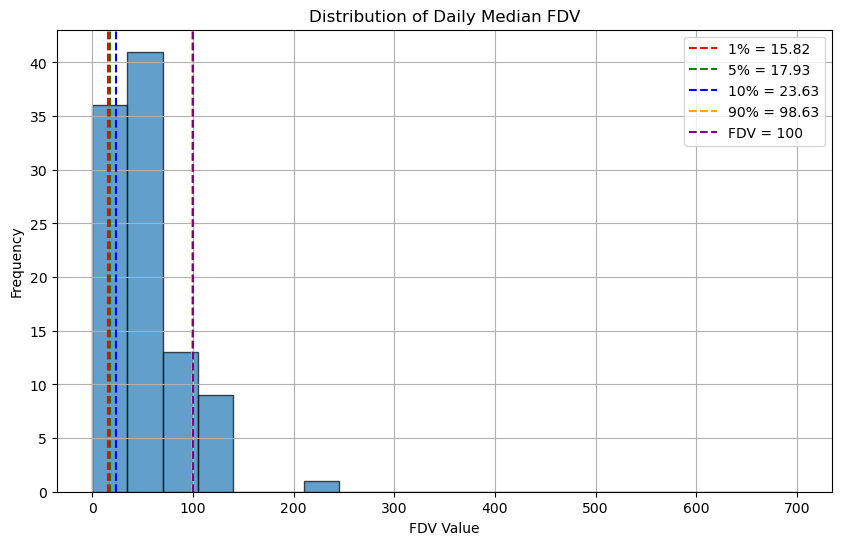

In [19]:
from scipy.stats import percentileofscore

# 1. Calculate quantiles (1%, 5%, 10%), (90%)
pct1 = np.percentile(median_path, 1)
pct5 = np.percentile(median_path, 5)
pct10 = np.percentile(median_path, 10)
pct90 = np.percentile(median_path, 90)

# 2. Find the percentile rank of 100 in median_path
quantile_100 = percentileofscore(median_path, 100)

# Print out the quantiles and percentile rank
print(f"1% quantile:  {pct1:.2f}")
print(f"5% quantile:  {pct5:.2f}")
print(f"10% quantile: {pct10:.2f}")
print(f"90% quantile: {pct90:.2f}")
print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

# 3. Plot the histogram of median_path
bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
plt.figure(figsize=(10, 6))
plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
plt.title("Distribution of Daily Median FDV")
plt.xlabel("FDV Value")
plt.ylabel("Frequency")

# 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

# 5. Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

# AIAgents + DeFi

### ***Optimistic*** performance (price) scenarios & ***bullish*** market:

In [20]:
# Define price scenarios under different performances
weight_for_unsuc = 0.1
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.382166, value: 31.261727
DeFi (defi) - sigma: 0.324729, value: 15.025110


In [21]:
# Define the scenario-specific parameters
volatility_multiplier = scenarios['Bullish']['volatility_multiplier']
growth_rate_multiplier = scenarios['Bullish']['growth_rate_multiplier']


Percentage of FDV simulations exceeding 100 million on day 100: 100.00%
Scenario: Very Optimistic
  Day 100 Mean FDV: 179.43
  Day 100 - 5th Percentile: 151.65
  Day 100 - 95th Percentile: 208.85



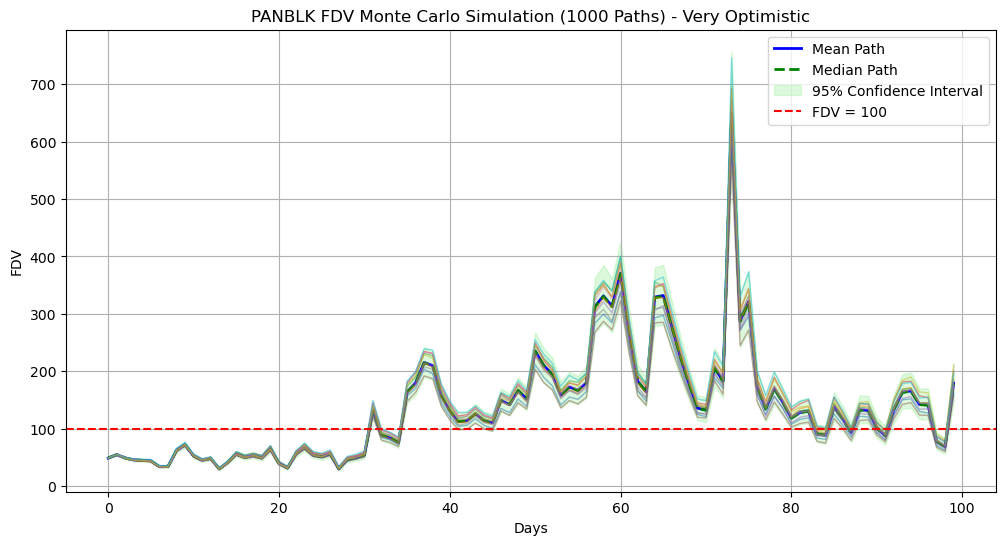

In [22]:
# Parameter Settings
# ====================
T_half = 50       # Transition period (days)
initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
np.random.seed(42)  # Fix random seed for reproducibility
paths = np.zeros((num_simulations, days))
paths[:, 0] = initial_FDV

for sim in range(num_simulations):
    for day in range(1, days):
        t = day - 1  # Current time index
        
        # Retrieve current parameters
        sigma = get_sigma(t)
        curr_value = get_value(t)
        next_value = get_value(t+1)
        
        # Convert annualized volatility to daily volatility
        sigma_daily = sigma / np.sqrt(365)
        
        # Compute volatility term
        z = np.random.normal()
        drift = sigma_daily * z - 0.5 * sigma_daily**2
        
        # Update FDV
        volume_ratio = usdt_volume[day] / usdt_volume[day-1]
        value_ratio = next_value / curr_value
        paths[:, 0] = curr_value * np.exp(drift)
        paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

# ====================
# Result Analysis
# ====================
# Compute statistics
mean_path = np.mean(paths, axis=0)
median_path = np.median(paths, axis=0)
std_dev = np.std(paths, axis=0)

# Compute percentage of simulations above 100 on day 100
above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(mean_path, 'b', lw=2, label='Mean Path')
plt.plot(median_path, 'g--', lw=2, label='Median Path')
#plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

# Confidence level
pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

# Day 100 specific stats
day_100_values = paths[:, -1]
day_100_mean = np.mean(day_100_values)
day_100_p5 = np.percentile(day_100_values, 5)
day_100_p95 = np.percentile(day_100_values, 95)

plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

print(f"Scenario: Very Optimistic")
print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

# Plot sample paths
for i in range(10):  # Plot first 10 paths
    plt.plot(paths[i], lw=1, alpha=0.5)

# Add horizontal line at 100
plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - Very Optimistic')
plt.xlabel('Days')
plt.ylabel('FDV')
plt.legend()
plt.grid(True)
plt.show()

# If we incorporate DeFi part into PANBLK valuation at the 60th day

1% quantile:  30.39
5% quantile:  39.30
10% quantile: 45.82
90% quantile: 268.09
100 is at the 40.00th percentile in the median distribution.


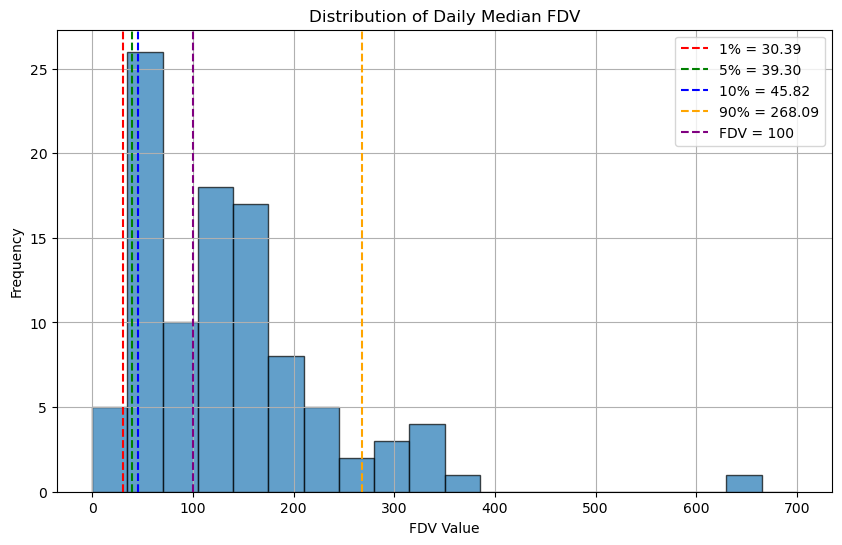

In [23]:
from scipy.stats import percentileofscore

# 1. Calculate quantiles (1%, 5%, 10%), (90%)
pct1 = np.percentile(median_path, 1)
pct5 = np.percentile(median_path, 5)
pct10 = np.percentile(median_path, 10)
pct90 = np.percentile(median_path, 90)

# 2. Find the percentile rank of 100 in median_path
quantile_100 = percentileofscore(median_path, 100)

# Print out the quantiles and percentile rank
print(f"1% quantile:  {pct1:.2f}")
print(f"5% quantile:  {pct5:.2f}")
print(f"10% quantile: {pct10:.2f}")
print(f"90% quantile: {pct90:.2f}")
print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

# 3. Plot the histogram of median_path
bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
plt.figure(figsize=(10, 6))
plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
plt.title("Distribution of Daily Median FDV")
plt.xlabel("FDV Value")
plt.ylabel("Frequency")

# 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

# 5. Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

### ***Pessimistic*** performance (price) scenarios & ***bearish*** market:

In [24]:
# Define price scenarios under different performances
weight_for_unsuc = 0.5
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.522144, value: 22.957448
DeFi (defi) - sigma: 0.480023, value: 11.050595


In [25]:
# Define the scenario-specific parameters
volatility_multiplier = scenarios['Bearish']['volatility_multiplier']
growth_rate_multiplier = scenarios['Bearish']['growth_rate_multiplier']


Percentage of FDV simulations exceeding 100 million on day 100: 36.60%
Scenario: Very Pessimistic
  Day 100 Mean FDV: 94.66
  Day 100 - 5th Percentile: 50.35
  Day 100 - 95th Percentile: 155.10



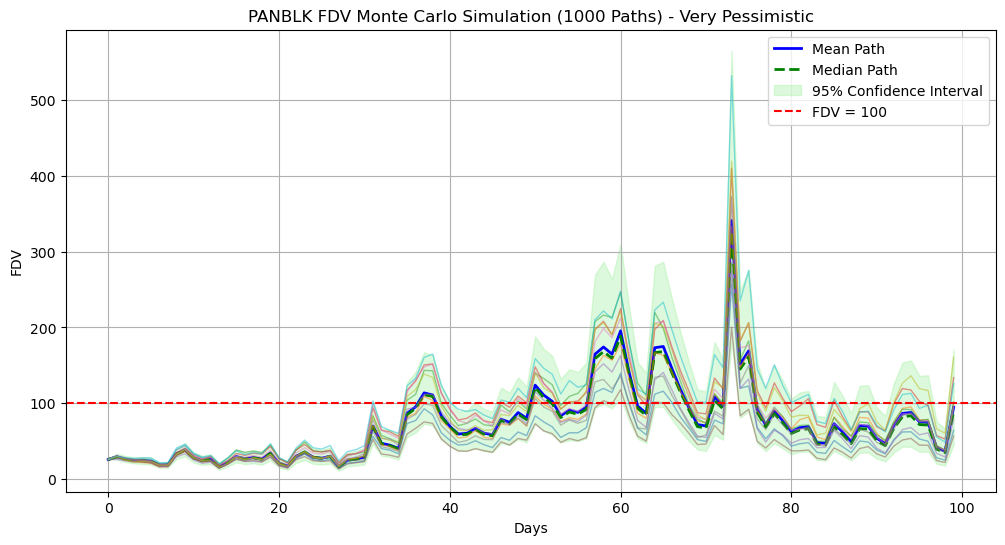

In [26]:
# Parameter Settings
# ====================
T_half = 50       # Transition period (days)
initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
np.random.seed(42)  # Fix random seed for reproducibility
paths = np.zeros((num_simulations, days))
paths[:, 0] = initial_FDV

for sim in range(num_simulations):
    for day in range(1, days):
        t = day - 1  # Current time index
        
        # Retrieve current parameters
        sigma = get_sigma(t)
        curr_value = get_value(t)
        next_value = get_value(t+1)
        
        # Convert annualized volatility to daily volatility
        sigma_daily = sigma / np.sqrt(365)
        
        # Compute volatility term
        z = np.random.normal()
        drift = sigma_daily * z - 0.5 * sigma_daily**2
        
        # Update FDV
        volume_ratio = usdt_volume[day] / usdt_volume[day-1]
        value_ratio = next_value / curr_value
        paths[:, 0] = curr_value * np.exp(drift)
        paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

# ====================
# Result Analysis
# ====================
# Compute statistics
mean_path = np.mean(paths, axis=0)
median_path = np.median(paths, axis=0)
std_dev = np.std(paths, axis=0)

# Compute percentage of simulations above 100 on day 100
above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(mean_path, 'b', lw=2, label='Mean Path')
plt.plot(median_path, 'g--', lw=2, label='Median Path')
#plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

# Confidence level
pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

# Day 100 specific stats
day_100_values = paths[:, -1]
day_100_mean = np.mean(day_100_values)
day_100_p5 = np.percentile(day_100_values, 5)
day_100_p95 = np.percentile(day_100_values, 95)

plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

print(f"Scenario: Very Pessimistic")
print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

# Plot sample paths
for i in range(10):  # Plot first 10 paths
    plt.plot(paths[i], lw=1, alpha=0.5)

# Add horizontal line at 100
plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - Very Pessimistic')
plt.xlabel('Days')
plt.ylabel('FDV')
plt.legend()
plt.grid(True)
plt.show()

# If we incorporate DeFi part into PANBLK valuation at the 60th day

1% quantile:  15.83
5% quantile:  20.45
10% quantile: 24.05
90% quantile: 137.16
100 is at the 83.00th percentile in the median distribution.


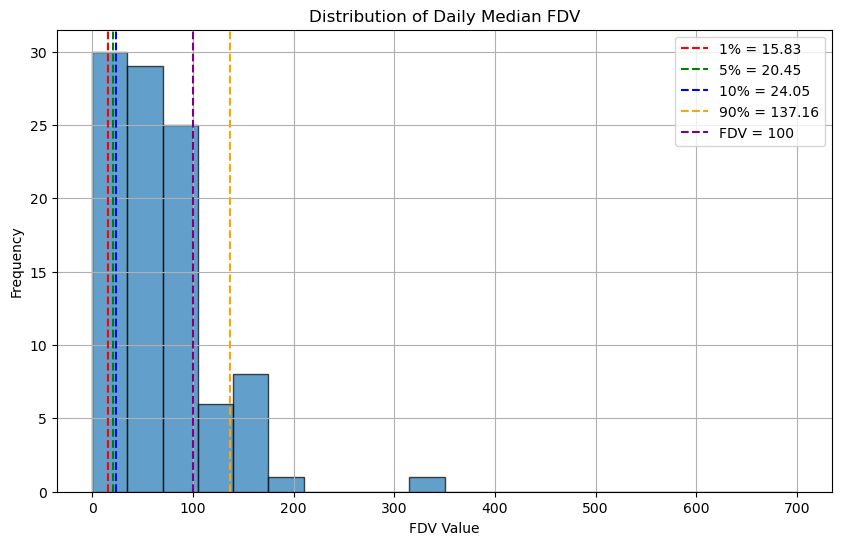

In [27]:
from scipy.stats import percentileofscore

# 1. Calculate quantiles (1%, 5%, 10%), (90%)
pct1 = np.percentile(median_path, 1)
pct5 = np.percentile(median_path, 5)
pct10 = np.percentile(median_path, 10)
pct90 = np.percentile(median_path, 90)

# 2. Find the percentile rank of 100 in median_path
quantile_100 = percentileofscore(median_path, 100)

# Print out the quantiles and percentile rank
print(f"1% quantile:  {pct1:.2f}")
print(f"5% quantile:  {pct5:.2f}")
print(f"10% quantile: {pct10:.2f}")
print(f"90% quantile: {pct90:.2f}")
print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

# 3. Plot the histogram of median_path
bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
plt.figure(figsize=(10, 6))
plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
plt.title("Distribution of Daily Median FDV")
plt.xlabel("FDV Value")
plt.ylabel("Frequency")

# 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

# 5. Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

*****

# All Results

<!DOCTYPE html>
<html lang="zh">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>AIAgents Table</title>
    <style>
        table {
            width: 60%;
            border-collapse: collapse;
            text-align: center;
            font-family: Arial, sans-serif;
        }
        th, td {
            border: 1px solid black;
            padding: 15px;
            position: relative;
        }
        .diagonal-cell {
            position: relative;
            width: 150px;
            height: 60px;
        }
        .diagonal-cell::before {
            content: "";
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
            background: linear-gradient(to bottom right, transparent 49%, black 49%, black 51%, transparent 51%);
        }
        .top-right {
            position: absolute;
            top: 5px;
            right: 10px;
            font-weight: bold;
            font-size: 14px;
        }
        .bottom-left {
            position: absolute;
            bottom: 5px;
            left: 10px;
            font-weight: bold;
            font-size: 14px;
        }
    </style>
</head>
<body>

<table>
    <tr>
        <th>Market-wise/Performance-wise</th>
        <th>Optimistic</th>
        <th>Neutral</th>
        <th>Pessimistic</th>
    </tr>
    <tr>
        <td>Bullish</td>
        <td>Mean FDV 121.19<br>100 at 55th percentile</td>
        <td>Mean FDV 102.66<br>100 at 67th percentile</td>
        <td>Mean FDV 89.07<br>100 at 76th percentile</td>
    </tr>
    <tr>
        <td>Neutral</td>
        <td>Mean FDV 114.05<br>100 at 56th percentile</td>
        <td>Mean FDV 96.66<br>100 at 73th percentile</td>
        <td>Mean FDV 83.89<br>100 at 79th percentile</td>
    </tr>
    <tr>
        <td>Bearish</td>
        <td>Mean FDV 86.83<br>100 at 78th percentile</td>
        <td>Mean FDV 73.62<br>100 at 86th percentile</td>
        <td>Mean FDV 63.90<br>100 at 90th percentile</td>
    </tr>
</table>

</body>
</html>

<!DOCTYPE html>
<html lang="zh">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>AIAgents + DeFi Table</title>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            text-align: center;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            position: relative;
        }
        .diagonal-cell {
            position: relative;
            width: 150px;
            height: 60px;
        }
        .diagonal-cell::before {
            content: "";
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
            background: linear-gradient(to bottom right, transparent 49%, black 49%, black 51%, transparent 51%);
        }
        .diagonal-cell span {
            position: absolute;
            width: 100%;
            text-align: center;
            font-weight: bold;
        }
        .top-right {
            top: 5px;
            left: 50%;
            transform: translateX(-25%);
        }
        .bottom-left {
            bottom: 5px;
            left: 10%;
        }
    </style>
</head>
<body>

<table>
    <tr>
        <th>Market-wise/Performance-wise</th>
        <th>Optimistic</th>
        <th>Neutral</th>
        <th>Pessimistic</th>
    </tr>
    <tr>
        <td>Bullish</td>
        <td>Mean FDV 179.43<br>100 at 40th percentile</td>
        <td>Mean FDV 164.60<br>100 at 41th percentile</td>
        <td>Mean FDV 131.94<br>100 at 58th percentile</td>
    </tr>
    <tr>
        <td>Neutral</td>
        <td>Mean FDV 168.86<br>100 at 41th percentile</td>
        <td>Mean FDV 154.94<br>100 at 46th percentile</td>
        <td>Mean FDV 124.27<br>100 at 63th percentile</td>
    </tr>
    <tr>
        <td>Bearish</td>
        <td>Mean FDV 128.57<br>100 at 61th percentile</td>
        <td>Mean FDV 117.99<br>100 at 65th percentile</td>
        <td>Mean FDV 94.66<br>100 at 83th percentile</td>
    </tr>
</table>

</body>
</html>

******

## AIAgents

### Optimistic: W = 0.1

In [28]:
# Define price scenarios under different performances
weight_for_unsuc = 0.1
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.382166, value: 31.261727
DeFi (defi) - sigma: 0.324729, value: 15.025110


Percentage of FDV simulations exceeding 100 million on day 100: 96.80%
Scenario: Bullish
  Day 100 Mean FDV: 121.19
  Day 100 - 5th Percentile: 102.09
  Day 100 - 95th Percentile: 141.61



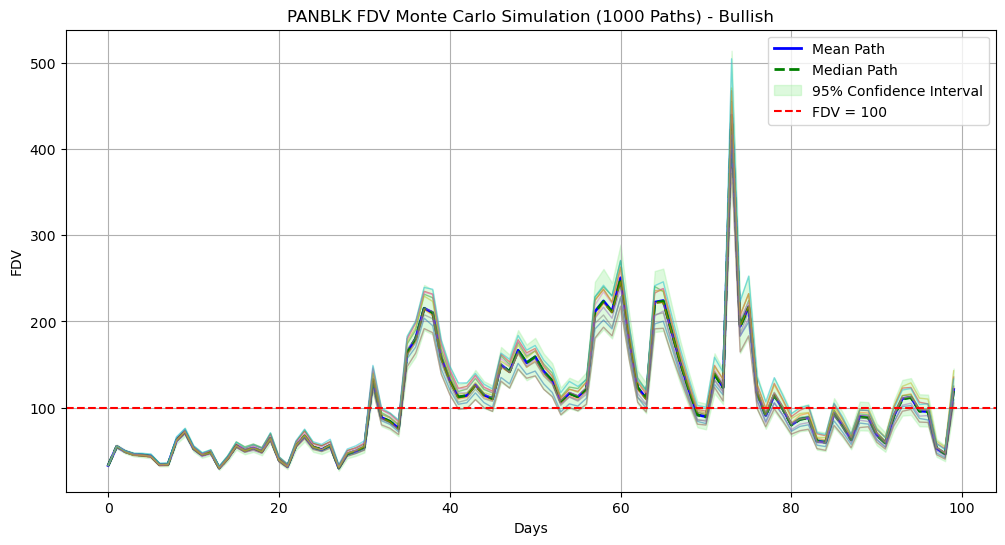

1% quantile:  30.39
5% quantile:  34.24
10% quantile: 45.28
90% quantile: 195.33
100 is at the 55.00th percentile in the median distribution.


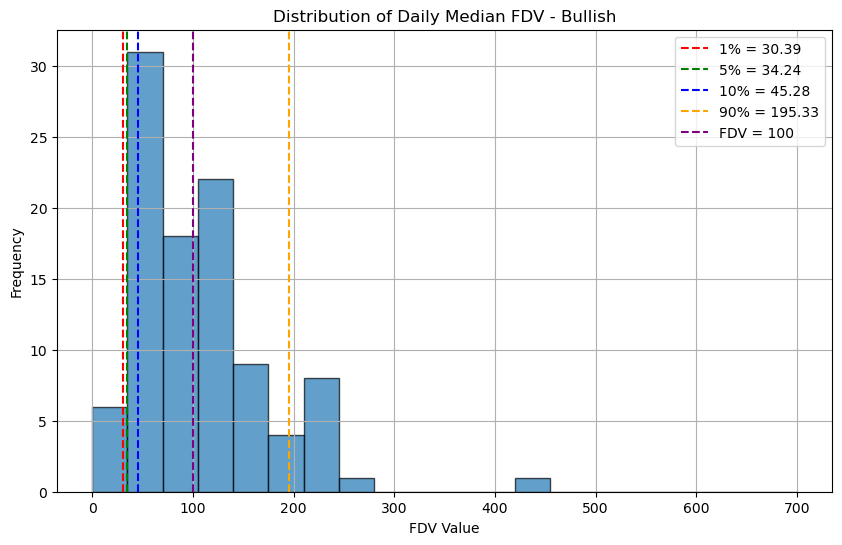

Percentage of FDV simulations exceeding 100 million on day 100: 72.00%
Scenario: Neutral
  Day 100 Mean FDV: 114.05
  Day 100 - 5th Percentile: 80.76
  Day 100 - 95th Percentile: 153.31



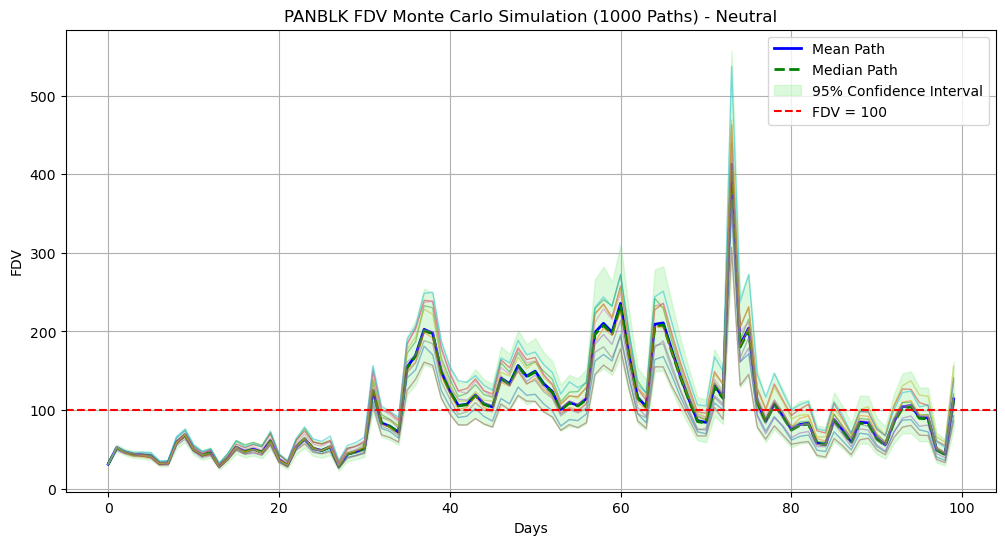

1% quantile:  28.52
5% quantile:  32.16
10% quantile: 42.52
90% quantile: 181.73
100 is at the 56.00th percentile in the median distribution.


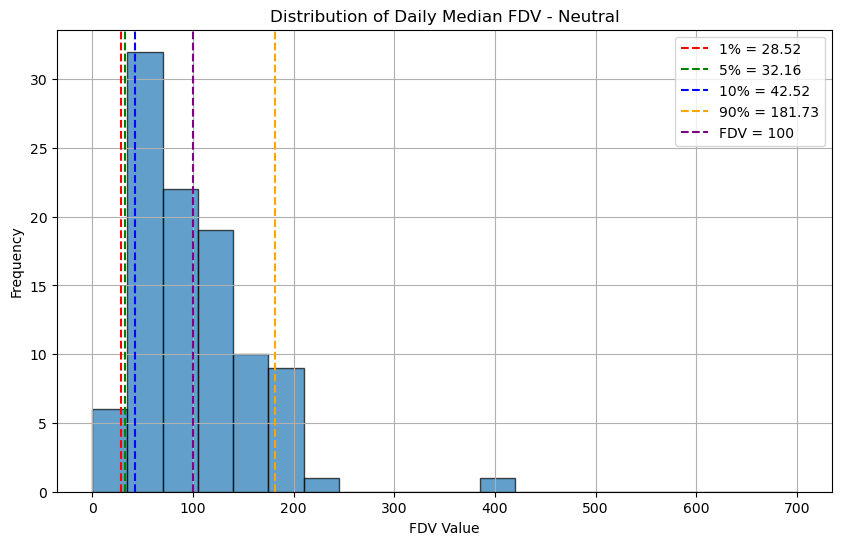

Percentage of FDV simulations exceeding 100 million on day 100: 24.60%
Scenario: Bearish
  Day 100 Mean FDV: 86.83
  Day 100 - 5th Percentile: 55.53
  Day 100 - 95th Percentile: 125.82



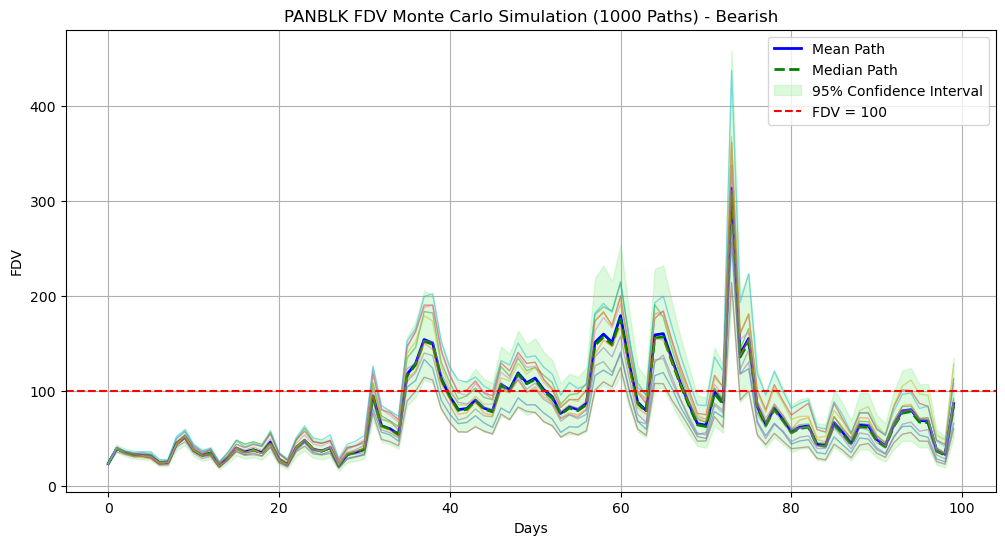

1% quantile:  21.66
5% quantile:  24.45
10% quantile: 32.31
90% quantile: 137.04
100 is at the 78.00th percentile in the median distribution.


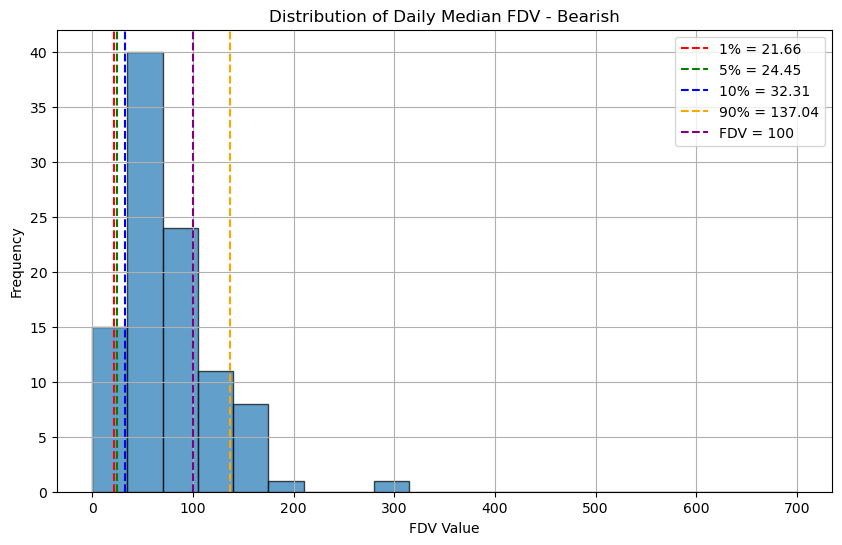

In [29]:
# Parameter Settings
# ====================
T_half = 101       # Transition period (days)
#initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t, volatility_multiplier):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t, growth_rate_multiplier):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
for scenario_name, settings in scenarios.items():

    np.random.seed(42)  # Fix random seed for reproducibility
    paths = np.zeros((num_simulations, days))
    #paths[:, 0] = initial_FDV

    for sim in range(num_simulations):
        for day in range(1, days):
            t = day - 1  # Current time index

            # Retrieve current parameters
            sigma = get_sigma(t, settings['volatility_multiplier'])
            curr_value = get_value(t, settings['growth_rate_multiplier'])
            next_value = get_value(t+1, settings['growth_rate_multiplier'])

            # Convert annualized volatility to daily volatility
            sigma_daily = sigma / np.sqrt(365)

            # Compute volatility term
            z = np.random.normal()
            drift = sigma_daily * z - 0.5 * sigma_daily**2

            # Update FDV
            volume_ratio = usdt_volume[day] / usdt_volume[day-1]
            value_ratio = next_value / curr_value
            paths[:, 0] = curr_value * np.exp(drift)
            paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

    # ====================
    # Result Analysis
    # ====================
    # Compute statistics
    mean_path = np.mean(paths, axis=0)
    median_path = np.median(paths, axis=0)
    std_dev = np.std(paths, axis=0)

    # Compute percentage of simulations above 100 on day 100
    above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
    print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mean_path, 'b', lw=2, label='Mean Path')
    plt.plot(median_path, 'g--', lw=2, label='Median Path')
    #plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

    # Confidence level
    pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
    pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

    # Day 100 specific stats
    day_100_values = paths[:, -1]
    day_100_mean = np.mean(day_100_values)
    day_100_p5 = np.percentile(day_100_values, 5)
    day_100_p95 = np.percentile(day_100_values, 95)

    plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

    print(f"Scenario: {scenario_name}")
    print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
    print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
    print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

    # Plot sample paths
    for i in range(10):  # Plot first 10 paths
        plt.plot(paths[i], lw=1, alpha=0.5)

    # Add horizontal line at 100
    plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

    plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - {scenario_name}')
    plt.xlabel('Days')
    plt.ylabel('FDV')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 1. Calculate quantiles (1%, 5%, 10%), (90%)
    pct1 = np.percentile(median_path, 1)
    pct5 = np.percentile(median_path, 5)
    pct10 = np.percentile(median_path, 10)
    pct90 = np.percentile(median_path, 90)

    # 2. Find the percentile rank of 100 in median_path
    quantile_100 = percentileofscore(median_path, 100)

    # Print out the quantiles and percentile rank
    print(f"1% quantile:  {pct1:.2f}")
    print(f"5% quantile:  {pct5:.2f}")
    print(f"10% quantile: {pct10:.2f}")
    print(f"90% quantile: {pct90:.2f}")
    print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

    # 3. Plot the histogram of median_path
    bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
    plt.figure(figsize=(10, 6))
    plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Daily Median FDV - {scenario_name}')
    plt.xlabel("FDV Value")
    plt.ylabel("Frequency")

    # 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
    plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
    plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
    plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
    plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
    plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

    # 5. Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()

# We did not incorporate DeFi part into PANBLK valuation

### Neutral: W = 0.3

In [30]:
weight_for_unsuc = 0.3
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.462922, value: 26.470797
DeFi (defi) - sigma: 0.414322, value: 12.732121


Percentage of FDV simulations exceeding 100 million on day 100: 56.90%
Scenario: Bullish
  Day 100 Mean FDV: 102.66
  Day 100 - 5th Percentile: 83.09
  Day 100 - 95th Percentile: 124.08



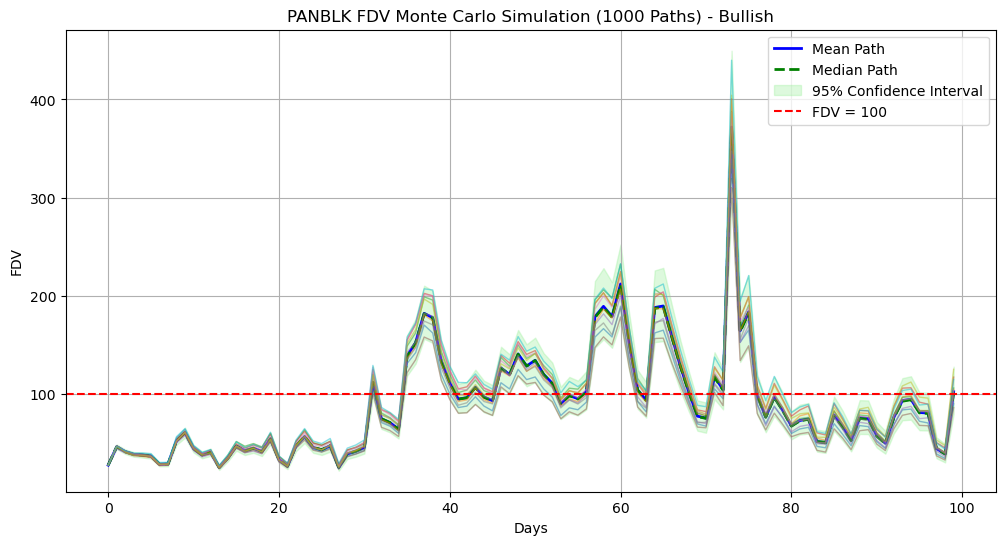

1% quantile:  25.73
5% quantile:  29.00
10% quantile: 38.34
90% quantile: 165.13
100 is at the 67.00th percentile in the median distribution.


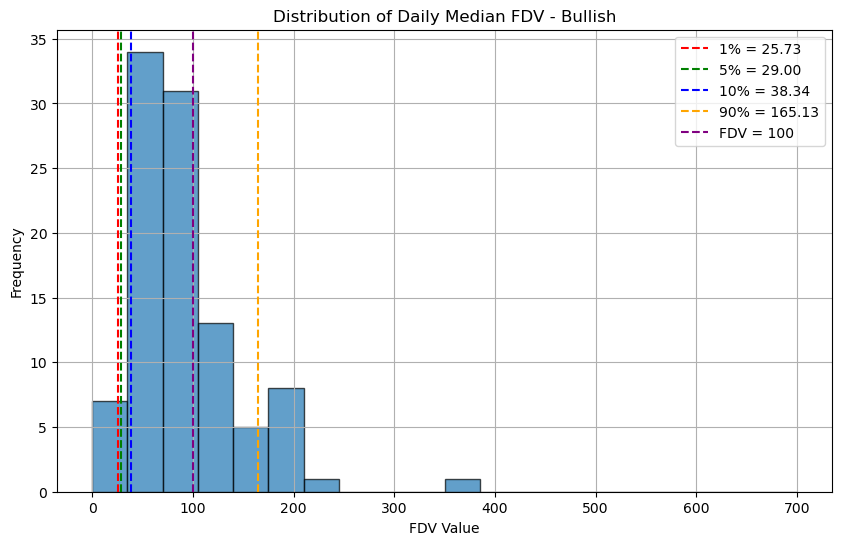

Percentage of FDV simulations exceeding 100 million on day 100: 39.00%
Scenario: Neutral
  Day 100 Mean FDV: 96.66
  Day 100 - 5th Percentile: 62.98
  Day 100 - 95th Percentile: 138.19



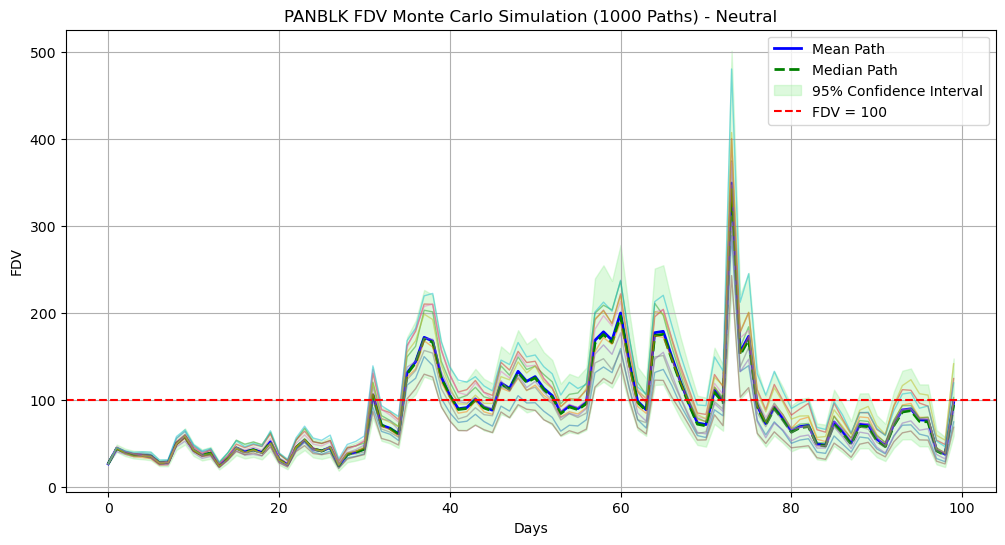

1% quantile:  24.12
5% quantile:  27.22
10% quantile: 35.98
90% quantile: 152.84
100 is at the 73.00th percentile in the median distribution.


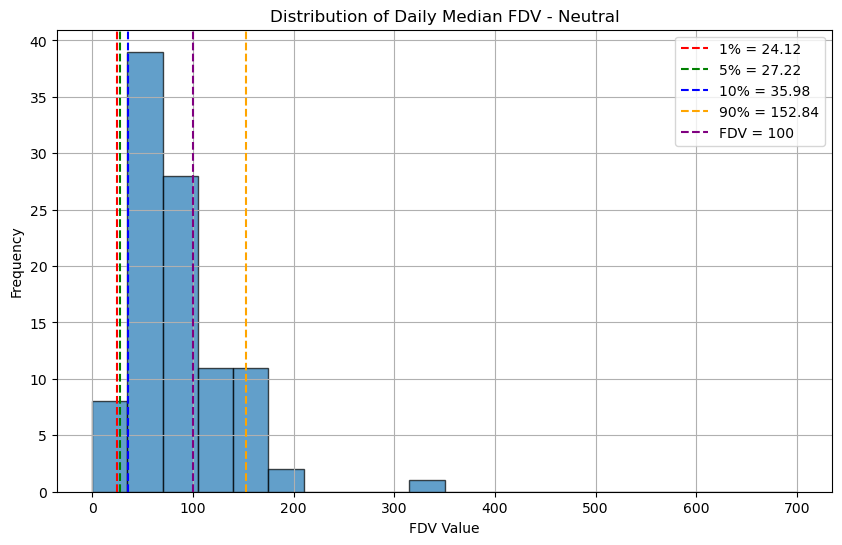

Percentage of FDV simulations exceeding 100 million on day 100: 12.10%
Scenario: Bearish
  Day 100 Mean FDV: 73.62
  Day 100 - 5th Percentile: 42.20
  Day 100 - 95th Percentile: 115.01



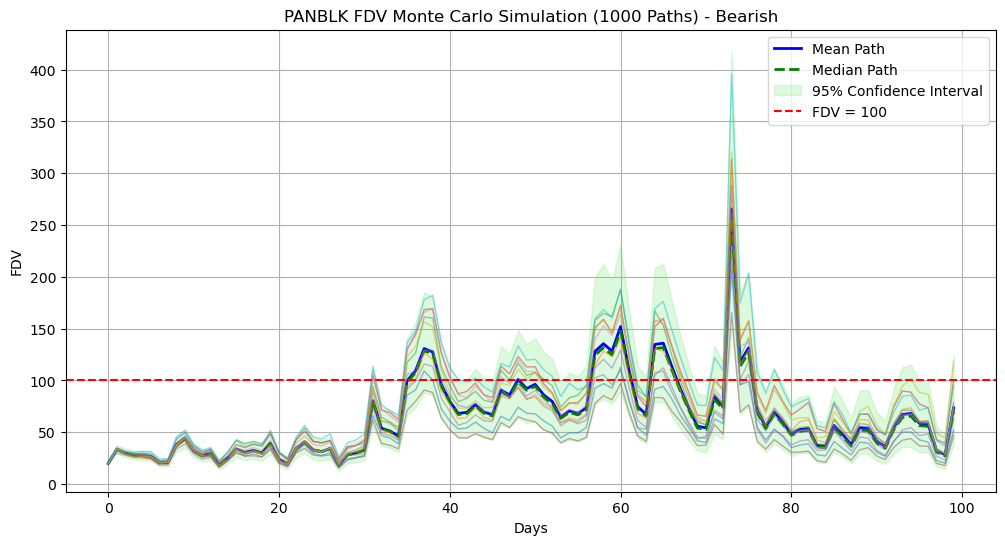

1% quantile:  18.29
5% quantile:  20.69
10% quantile: 27.28
90% quantile: 114.76
100 is at the 86.00th percentile in the median distribution.


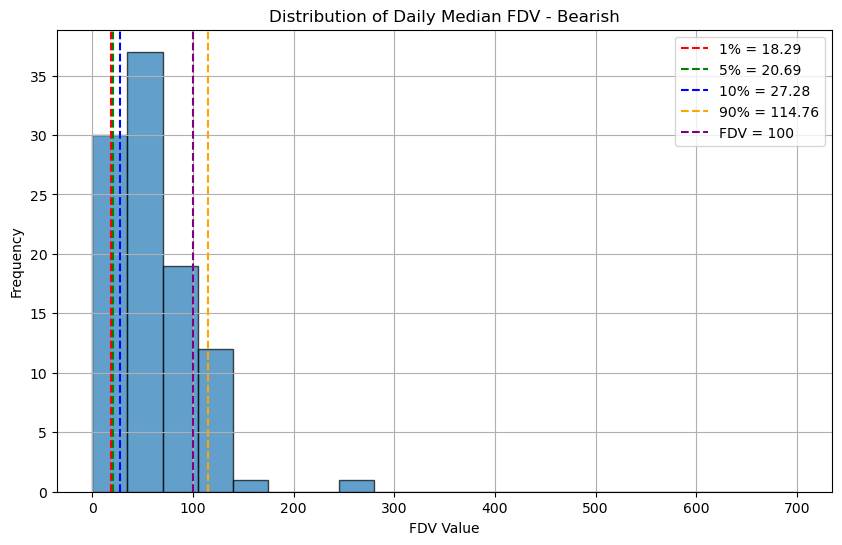

In [31]:
# Parameter Settings
# ====================
T_half = 101       # Transition period (days)
#initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t, volatility_multiplier):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t, growth_rate_multiplier):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
for scenario_name, settings in scenarios.items():

    np.random.seed(42)  # Fix random seed for reproducibility
    paths = np.zeros((num_simulations, days))
    #paths[:, 0] = initial_FDV

    for sim in range(num_simulations):
        for day in range(1, days):
            t = day - 1  # Current time index

            # Retrieve current parameters
            sigma = get_sigma(t, settings['volatility_multiplier'])
            curr_value = get_value(t, settings['growth_rate_multiplier'])
            next_value = get_value(t+1, settings['growth_rate_multiplier'])

            # Convert annualized volatility to daily volatility
            sigma_daily = sigma / np.sqrt(365)

            # Compute volatility term
            z = np.random.normal()
            drift = sigma_daily * z - 0.5 * sigma_daily**2

            # Update FDV
            volume_ratio = usdt_volume[day] / usdt_volume[day-1]
            value_ratio = next_value / curr_value
            paths[:, 0] = curr_value * np.exp(drift)
            paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

    # ====================
    # Result Analysis
    # ====================
    # Compute statistics
    mean_path = np.mean(paths, axis=0)
    median_path = np.median(paths, axis=0)
    std_dev = np.std(paths, axis=0)

    # Compute percentage of simulations above 100 on day 100
    above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
    print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mean_path, 'b', lw=2, label='Mean Path')
    plt.plot(median_path, 'g--', lw=2, label='Median Path')
    #plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

    # Confidence level
    pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
    pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

    # Day 100 specific stats
    day_100_values = paths[:, -1]
    day_100_mean = np.mean(day_100_values)
    day_100_p5 = np.percentile(day_100_values, 5)
    day_100_p95 = np.percentile(day_100_values, 95)

    plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

    print(f"Scenario: {scenario_name}")
    print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
    print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
    print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

    # Plot sample paths
    for i in range(10):  # Plot first 10 paths
        plt.plot(paths[i], lw=1, alpha=0.5)

    # Add horizontal line at 100
    plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

    plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - {scenario_name}')
    plt.xlabel('Days')
    plt.ylabel('FDV')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 1. Calculate quantiles (1%, 5%, 10%), (90%)
    pct1 = np.percentile(median_path, 1)
    pct5 = np.percentile(median_path, 5)
    pct10 = np.percentile(median_path, 10)
    pct90 = np.percentile(median_path, 90)

    # 2. Find the percentile rank of 100 in median_path
    quantile_100 = percentileofscore(median_path, 100)

    # Print out the quantiles and percentile rank
    print(f"1% quantile:  {pct1:.2f}")
    print(f"5% quantile:  {pct5:.2f}")
    print(f"10% quantile: {pct10:.2f}")
    print(f"90% quantile: {pct90:.2f}")
    print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

    # 3. Plot the histogram of median_path
    bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
    plt.figure(figsize=(10, 6))
    plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Daily Median FDV - {scenario_name}')
    plt.xlabel("FDV Value")
    plt.ylabel("Frequency")

    # 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
    plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
    plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
    plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
    plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
    plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

    # 5. Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()

# We did not incorporate DeFi part into PANBLK valuation

### Pessimistic: W = 0.5

In [32]:
weight_for_unsuc = 0.5
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.522144, value: 22.957448
DeFi (defi) - sigma: 0.480023, value: 11.050595


Percentage of FDV simulations exceeding 100 million on day 100: 18.90%
Scenario: Bullish
  Day 100 Mean FDV: 89.07
  Day 100 - 5th Percentile: 69.96
  Day 100 - 95th Percentile: 110.32



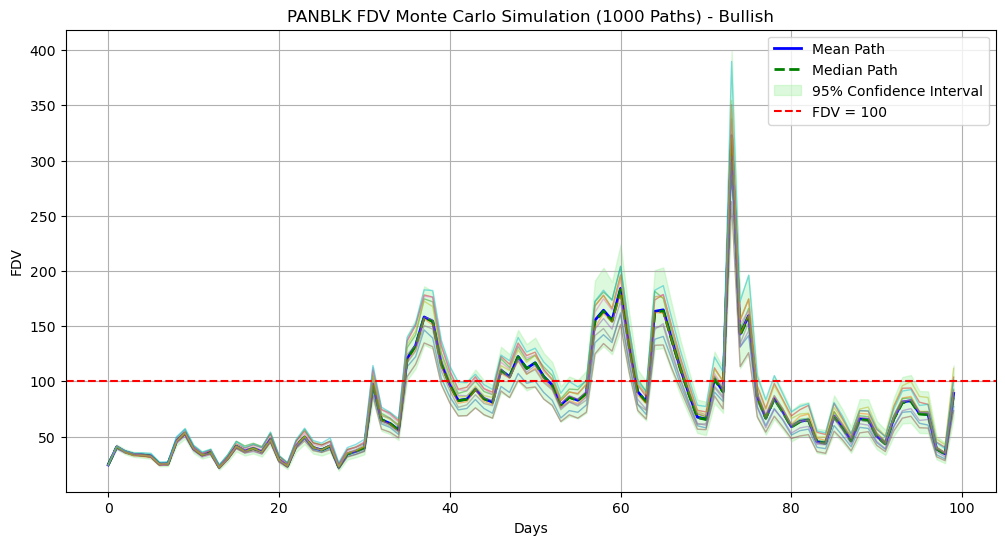

1% quantile:  22.31
5% quantile:  25.15
10% quantile: 33.25
90% quantile: 143.04
100 is at the 76.00th percentile in the median distribution.


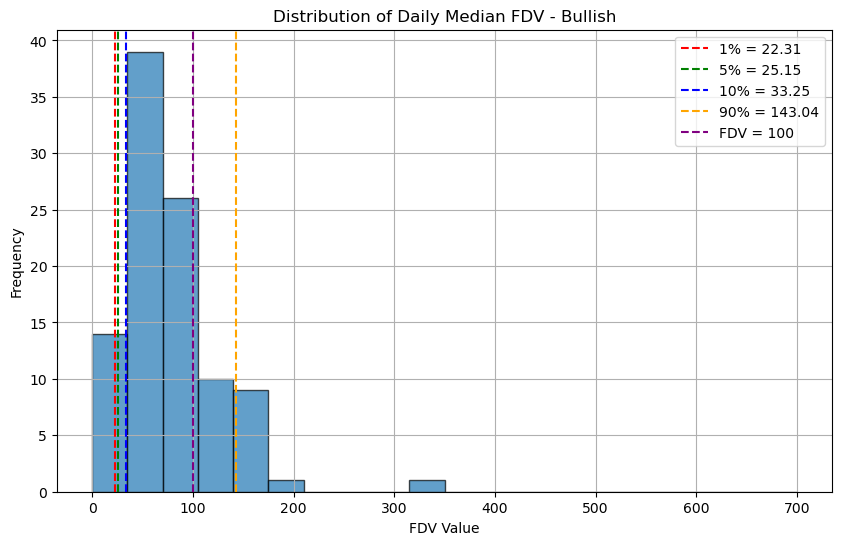

Percentage of FDV simulations exceeding 100 million on day 100: 21.90%
Scenario: Neutral
  Day 100 Mean FDV: 83.89
  Day 100 - 5th Percentile: 51.35
  Day 100 - 95th Percentile: 125.33



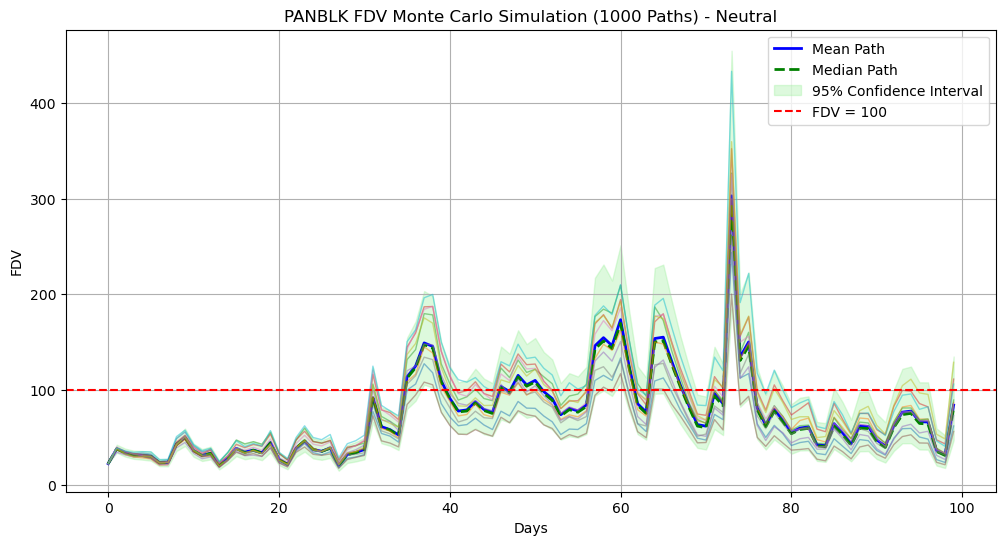

1% quantile:  20.89
5% quantile:  23.60
10% quantile: 31.19
90% quantile: 131.82
100 is at the 79.00th percentile in the median distribution.


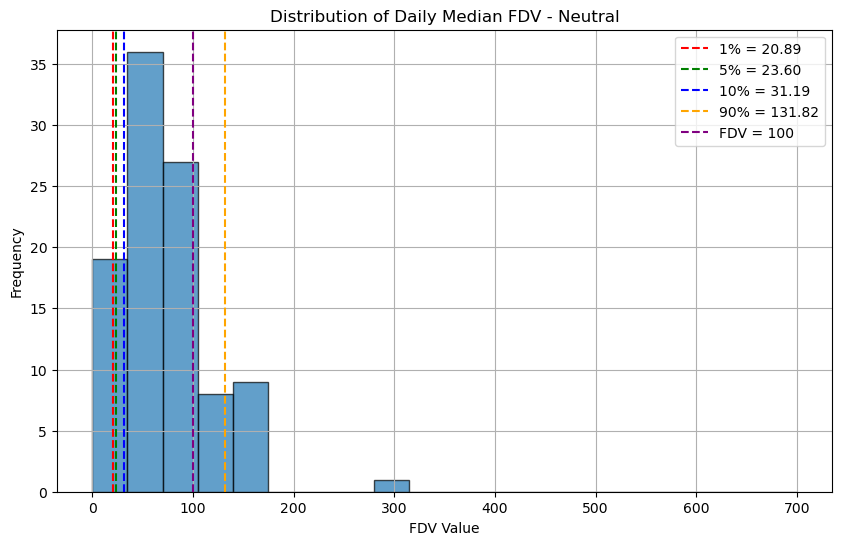

Percentage of FDV simulations exceeding 100 million on day 100: 7.10%
Scenario: Bearish
  Day 100 Mean FDV: 63.90
  Day 100 - 5th Percentile: 33.72
  Day 100 - 95th Percentile: 105.31



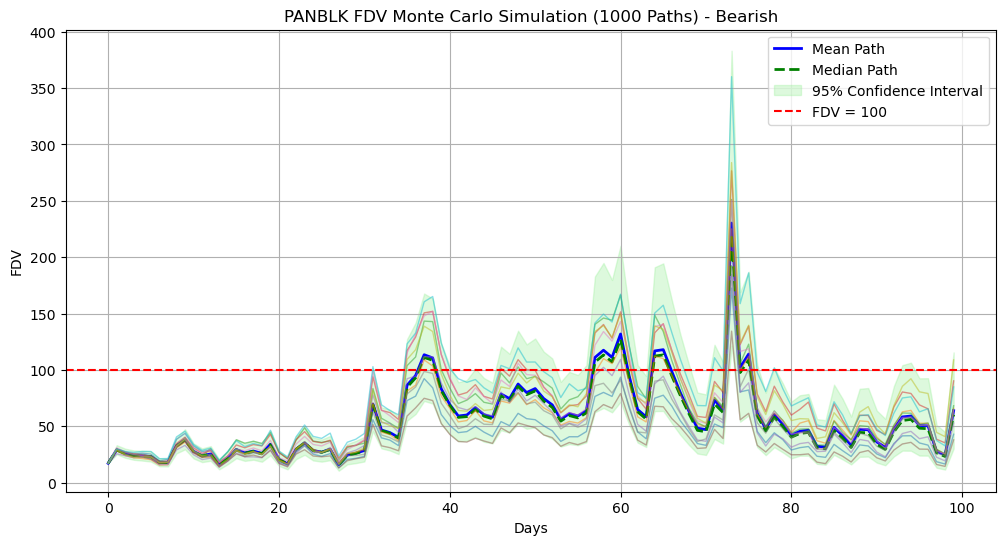

1% quantile:  15.82
5% quantile:  17.93
10% quantile: 23.63
90% quantile: 98.63
100 is at the 90.00th percentile in the median distribution.


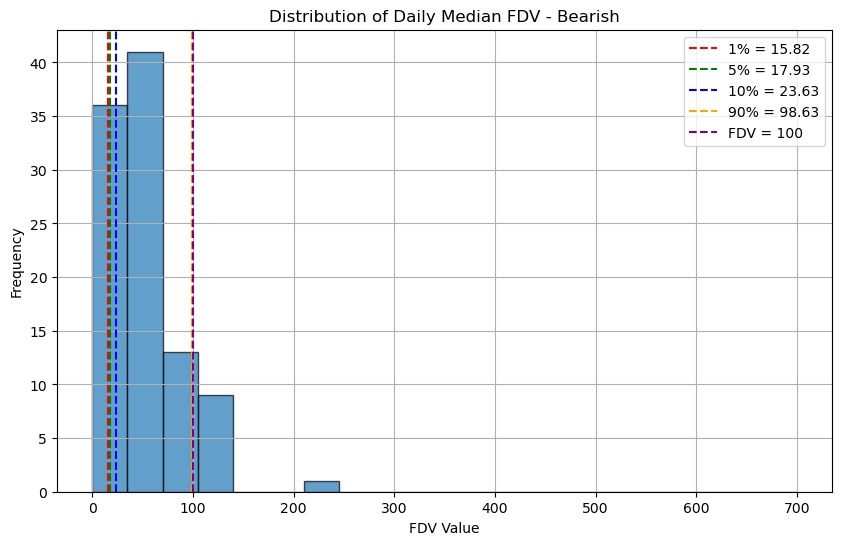

In [33]:
# Parameter Settings
# ====================
T_half = 101       # Transition period (days)
#initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t, volatility_multiplier):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t, growth_rate_multiplier):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================
for scenario_name, settings in scenarios.items():

    np.random.seed(42)  # Fix random seed for reproducibility
    paths = np.zeros((num_simulations, days))
    #paths[:, 0] = initial_FDV

    for sim in range(num_simulations):
        for day in range(1, days):
            t = day - 1  # Current time index

            # Retrieve current parameters
            sigma = get_sigma(t, settings['volatility_multiplier'])
            curr_value = get_value(t, settings['growth_rate_multiplier'])
            next_value = get_value(t+1, settings['growth_rate_multiplier'])

            # Convert annualized volatility to daily volatility
            sigma_daily = sigma / np.sqrt(365)

            # Compute volatility term
            z = np.random.normal()
            drift = sigma_daily * z - 0.5 * sigma_daily**2

            # Update FDV
            volume_ratio = usdt_volume[day] / usdt_volume[day-1]
            value_ratio = next_value / curr_value
            paths[:, 0] = curr_value * np.exp(drift)
            paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

    # ====================
    # Result Analysis
    # ====================
    # Compute statistics
    mean_path = np.mean(paths, axis=0)
    median_path = np.median(paths, axis=0)
    std_dev = np.std(paths, axis=0)

    # Compute percentage of simulations above 100 on day 100
    above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
    print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mean_path, 'b', lw=2, label='Mean Path')
    plt.plot(median_path, 'g--', lw=2, label='Median Path')
    #plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

    # Confidence level
    pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
    pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

    # Day 100 specific stats
    day_100_values = paths[:, -1]
    day_100_mean = np.mean(day_100_values)
    day_100_p5 = np.percentile(day_100_values, 5)
    day_100_p95 = np.percentile(day_100_values, 95)

    plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

    print(f"Scenario: {scenario_name}")
    print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
    print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
    print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

    # Plot sample paths
    for i in range(10):  # Plot first 10 paths
        plt.plot(paths[i], lw=1, alpha=0.5)

    # Add horizontal line at 100
    plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

    plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - {scenario_name}')
    plt.xlabel('Days')
    plt.ylabel('FDV')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 1. Calculate quantiles (1%, 5%, 10%), (90%)
    pct1 = np.percentile(median_path, 1)
    pct5 = np.percentile(median_path, 5)
    pct10 = np.percentile(median_path, 10)
    pct90 = np.percentile(median_path, 90)

    # 2. Find the percentile rank of 100 in median_path
    quantile_100 = percentileofscore(median_path, 100)

    # Print out the quantiles and percentile rank
    print(f"1% quantile:  {pct1:.2f}")
    print(f"5% quantile:  {pct5:.2f}")
    print(f"10% quantile: {pct10:.2f}")
    print(f"90% quantile: {pct90:.2f}")
    print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

    # 3. Plot the histogram of median_path
    bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
    plt.figure(figsize=(10, 6))
    plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Daily Median FDV - {scenario_name}')
    plt.xlabel("FDV Value")
    plt.ylabel("Frequency")

    # 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
    plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
    plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
    plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
    plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
    plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

    # 5. Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()

# We did not incorporate DeFi part into PANBLK valuation

## AIAgents + DeFi

### Optimistic: W = 0.1

In [34]:
weight_for_unsuc = 0.1
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.382166, value: 31.261727
DeFi (defi) - sigma: 0.324729, value: 15.025110


Percentage of FDV simulations exceeding 100 million on day 100: 100.00%
Scenario: Bullish
  Day 100 Mean FDV: 179.43
  Day 100 - 5th Percentile: 151.65
  Day 100 - 95th Percentile: 208.85



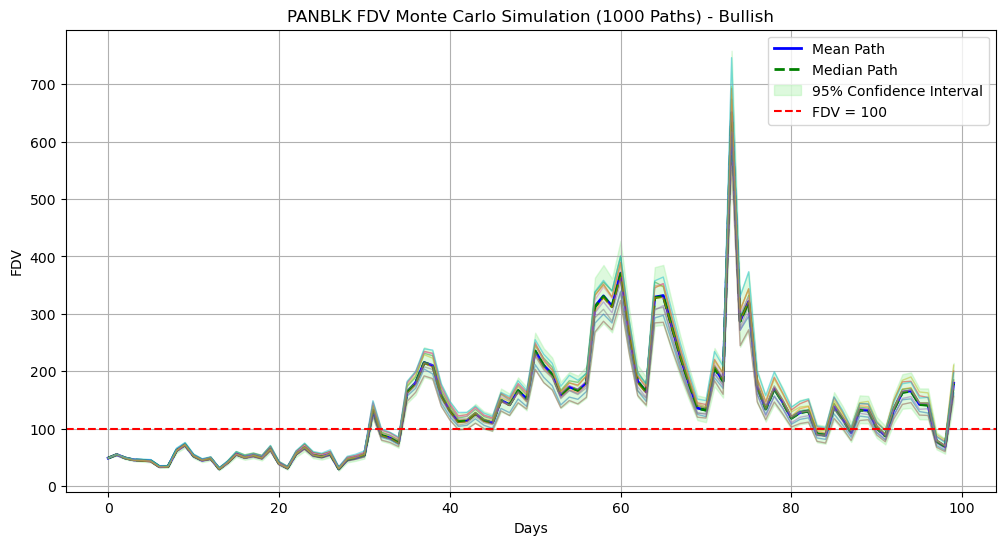

1% quantile:  30.39
5% quantile:  39.30
10% quantile: 45.82
90% quantile: 268.09
100 is at the 40.00th percentile in the median distribution.


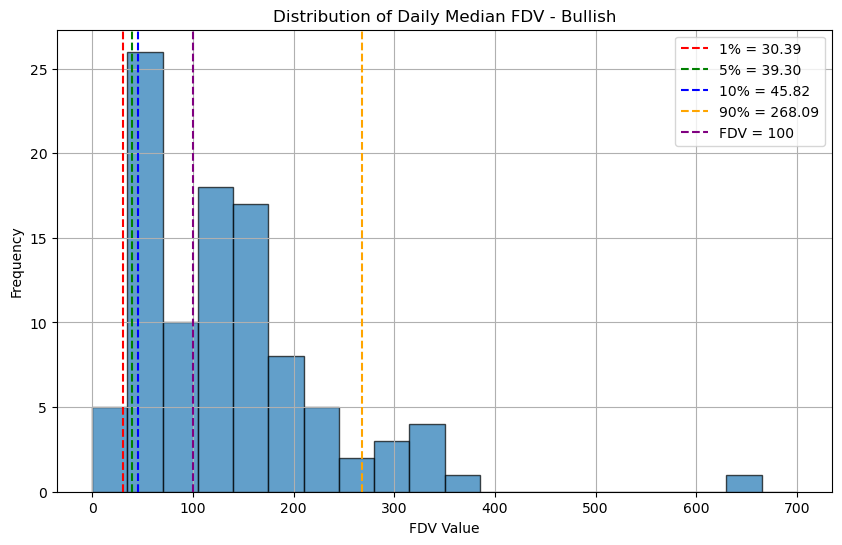

Percentage of FDV simulations exceeding 100 million on day 100: 99.50%
Scenario: Neutral
  Day 100 Mean FDV: 168.86
  Day 100 - 5th Percentile: 120.38
  Day 100 - 95th Percentile: 225.33



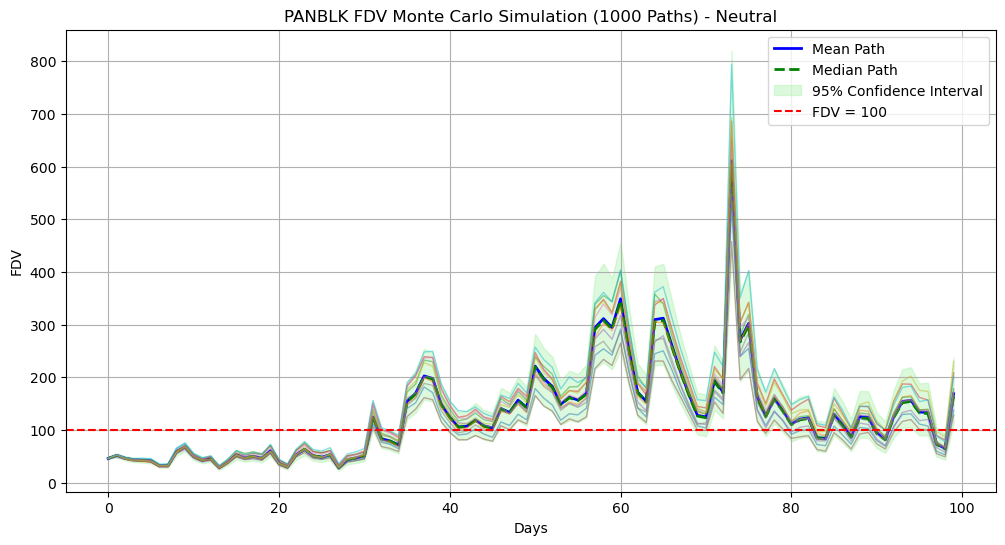

1% quantile:  28.52
5% quantile:  36.85
10% quantile: 43.06
90% quantile: 250.14
100 is at the 41.00th percentile in the median distribution.


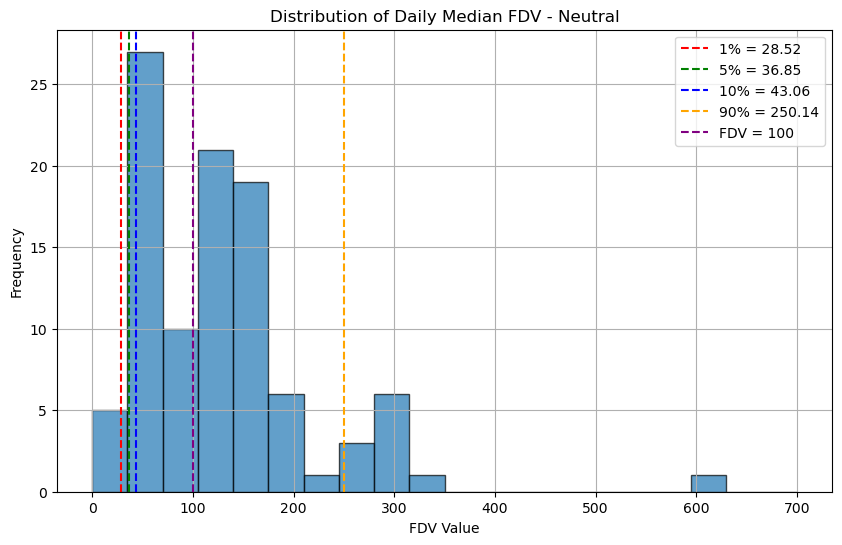

Percentage of FDV simulations exceeding 100 million on day 100: 83.30%
Scenario: Bearish
  Day 100 Mean FDV: 128.57
  Day 100 - 5th Percentile: 82.95
  Day 100 - 95th Percentile: 184.61



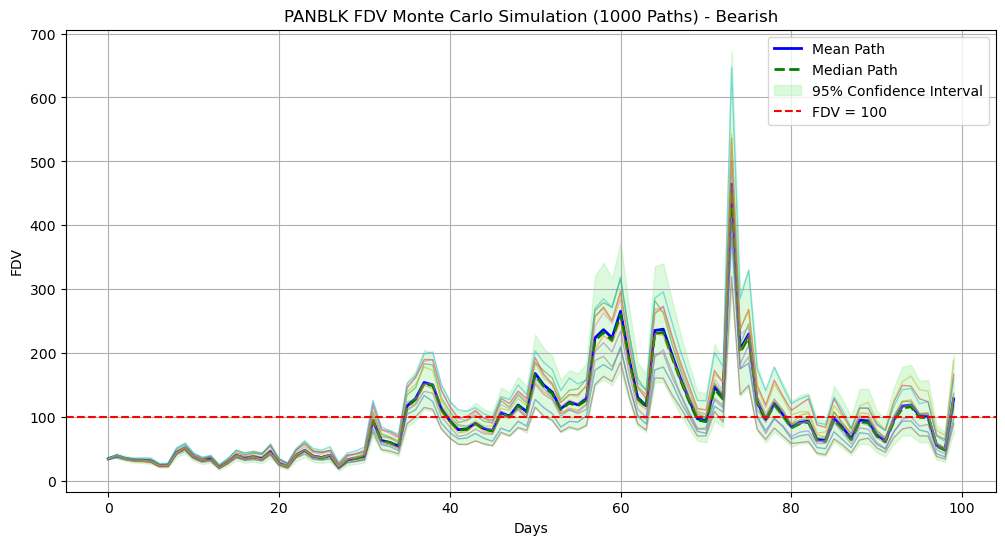

1% quantile:  21.66
5% quantile:  27.97
10% quantile: 32.76
90% quantile: 189.08
100 is at the 61.00th percentile in the median distribution.


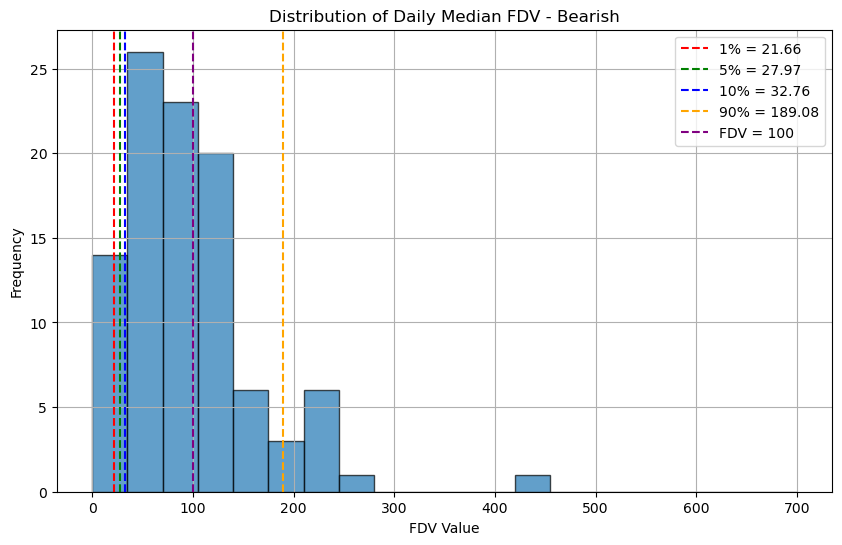

In [35]:
# Parameter Settings
# ====================
T_half = 50       # Transition period (days)
initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t, volatility_multiplier):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t, growth_rate_multiplier):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================

for scenario_name, settings in scenarios.items():

    np.random.seed(42)  # Fix random seed for reproducibility
    paths = np.zeros((num_simulations, days))
    paths[:, 0] = initial_FDV

    for sim in range(num_simulations):
        for day in range(1, days):
            t = day - 1  # Current time index

            # Retrieve current parameters
            sigma = get_sigma(t, settings['volatility_multiplier'])
            curr_value = get_value(t, settings['growth_rate_multiplier'])
            next_value = get_value(t+1, settings['growth_rate_multiplier'])

            # Convert annualized volatility to daily volatility
            sigma_daily = sigma / np.sqrt(365)

            # Compute volatility term
            z = np.random.normal()
            drift = sigma_daily * z - 0.5 * sigma_daily**2

            # Update FDV
            volume_ratio = usdt_volume[day] / usdt_volume[day-1]
            value_ratio = next_value / curr_value
            paths[:, 0] = curr_value * np.exp(drift)
            paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

    # ====================
    # Result Analysis
    # ====================
    # Compute statistics
    mean_path = np.mean(paths, axis=0)
    median_path = np.median(paths, axis=0)
    std_dev = np.std(paths, axis=0)

    # Compute percentage of simulations above 100 on day 100
    above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
    print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mean_path, 'b', lw=2, label='Mean Path')
    plt.plot(median_path, 'g--', lw=2, label='Median Path')
    #plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

    # Confidence level
    pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
    pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

    # Day 100 specific stats
    day_100_values = paths[:, -1]
    day_100_mean = np.mean(day_100_values)
    day_100_p5 = np.percentile(day_100_values, 5)
    day_100_p95 = np.percentile(day_100_values, 95)

    plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

    print(f"Scenario: {scenario_name}")
    print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
    print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
    print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

    # Plot sample paths
    for i in range(10):  # Plot first 10 paths
        plt.plot(paths[i], lw=1, alpha=0.5)

    # Add horizontal line at 100
    plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

    plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - {scenario_name}')
    plt.xlabel('Days')
    plt.ylabel('FDV')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 1. Calculate quantiles (1%, 5%, 10%), (90%)
    pct1 = np.percentile(median_path, 1)
    pct5 = np.percentile(median_path, 5)
    pct10 = np.percentile(median_path, 10)
    pct90 = np.percentile(median_path, 90)

    # 2. Find the percentile rank of 100 in median_path
    quantile_100 = percentileofscore(median_path, 100)

    # Print out the quantiles and percentile rank
    print(f"1% quantile:  {pct1:.2f}")
    print(f"5% quantile:  {pct5:.2f}")
    print(f"10% quantile: {pct10:.2f}")
    print(f"90% quantile: {pct90:.2f}")
    print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

    # 3. Plot the histogram of median_path
    bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
    plt.figure(figsize=(10, 6))
    plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Daily Median FDV - {scenario_name}')
    plt.xlabel("FDV Value")
    plt.ylabel("Frequency")

    # 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
    plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
    plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
    plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
    plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
    plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

    # 5. Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()


# If we incorporate DeFi part into PANBLK valuation at the 60th day

### Neutral: W = 0.3

In [36]:
weight_for_unsuc = 0.2
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.425909, value: 28.666640
DeFi (defi) - sigma: 0.373258, value: 13.783074


Percentage of FDV simulations exceeding 100 million on day 100: 100.00%
Scenario: Bullish
  Day 100 Mean FDV: 164.60
  Day 100 - 5th Percentile: 136.19
  Day 100 - 95th Percentile: 195.21



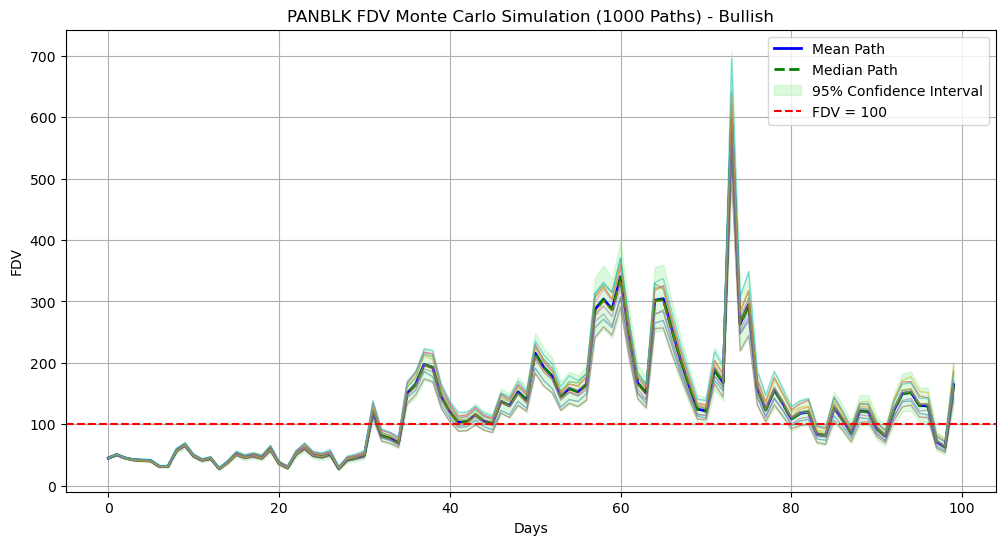

1% quantile:  27.87
5% quantile:  36.04
10% quantile: 42.02
90% quantile: 245.77
100 is at the 41.00th percentile in the median distribution.


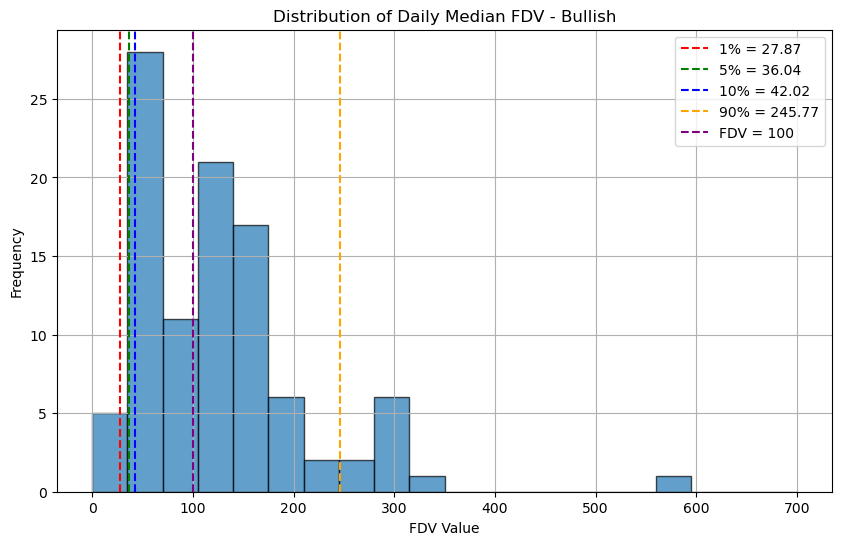

Percentage of FDV simulations exceeding 100 million on day 100: 96.90%
Scenario: Neutral
  Day 100 Mean FDV: 154.94
  Day 100 - 5th Percentile: 105.69
  Day 100 - 95th Percentile: 213.99



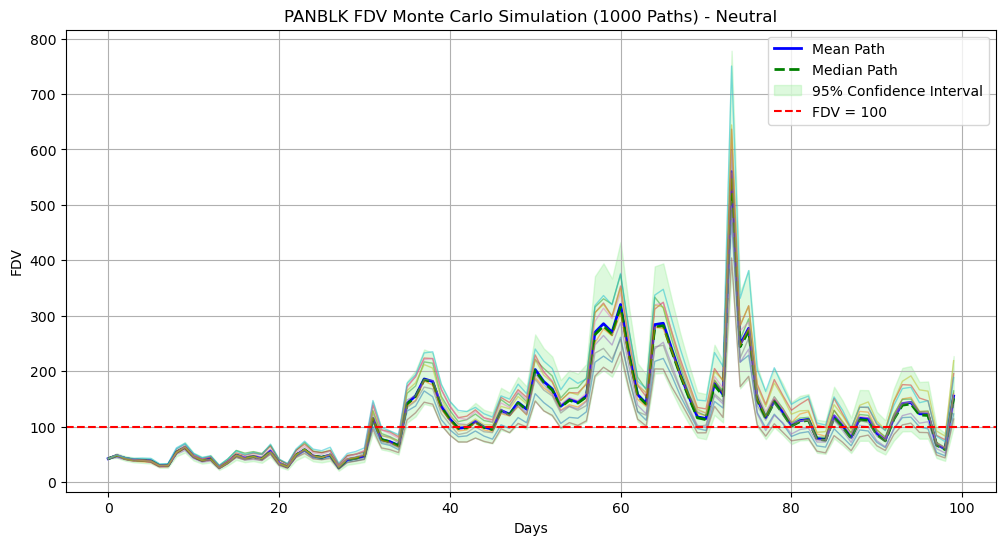

1% quantile:  26.14
5% quantile:  33.76
10% quantile: 39.49
90% quantile: 228.90
100 is at the 46.00th percentile in the median distribution.


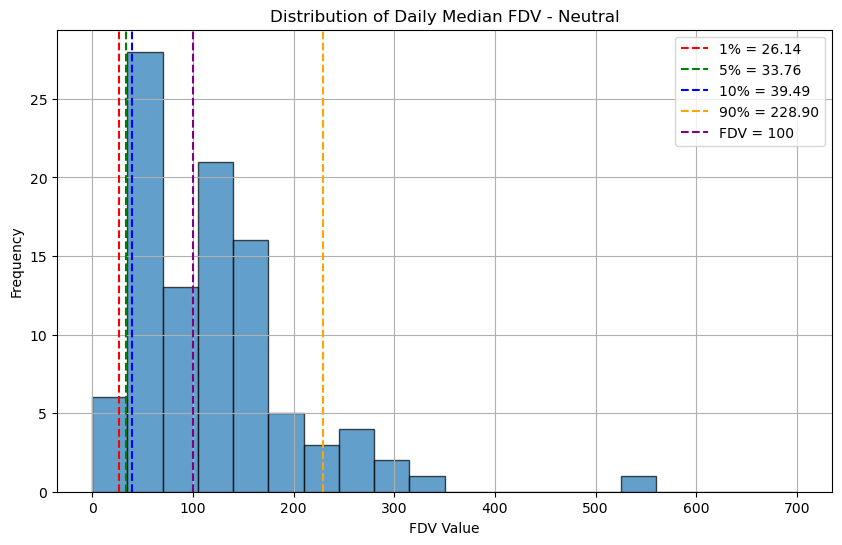

Percentage of FDV simulations exceeding 100 million on day 100: 68.20%
Scenario: Bearish
  Day 100 Mean FDV: 117.99
  Day 100 - 5th Percentile: 71.84
  Day 100 - 95th Percentile: 176.72



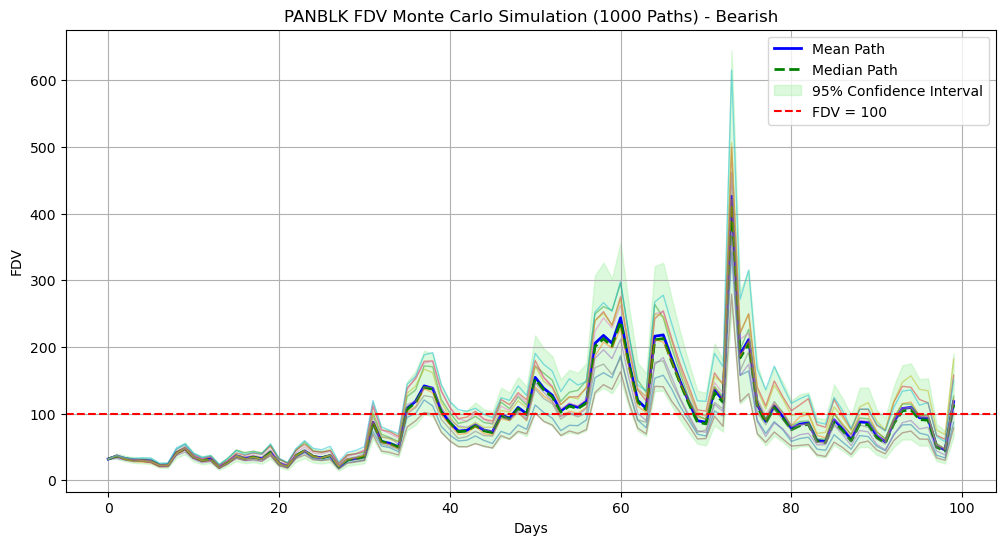

1% quantile:  19.84
5% quantile:  25.62
10% quantile: 30.04
90% quantile: 172.73
100 is at the 65.00th percentile in the median distribution.


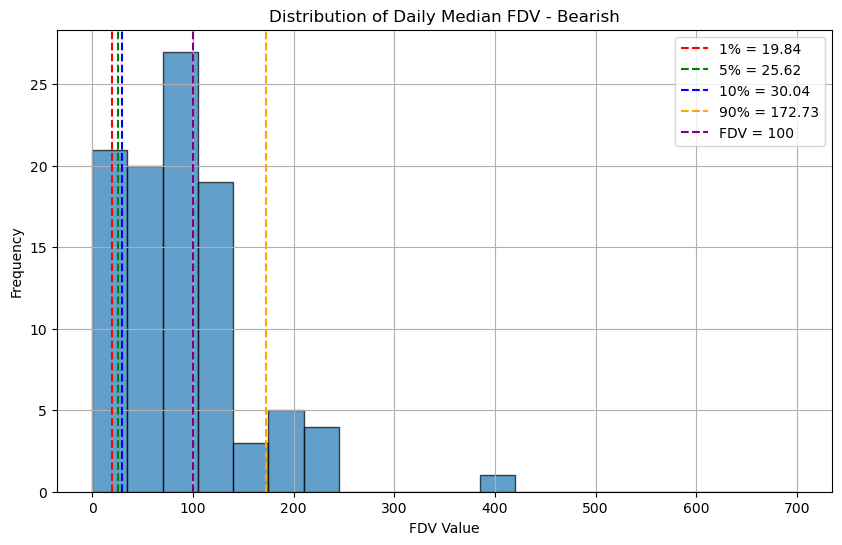

In [37]:
# Parameter Settings
# ====================
T_half = 50       # Transition period (days)
initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t, volatility_multiplier):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t, growth_rate_multiplier):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================

for scenario_name, settings in scenarios.items():

    np.random.seed(42)  # Fix random seed for reproducibility
    paths = np.zeros((num_simulations, days))
    paths[:, 0] = initial_FDV

    for sim in range(num_simulations):
        for day in range(1, days):
            t = day - 1  # Current time index

            # Retrieve current parameters
            sigma = get_sigma(t, settings['volatility_multiplier'])
            curr_value = get_value(t, settings['growth_rate_multiplier'])
            next_value = get_value(t+1, settings['growth_rate_multiplier'])

            # Convert annualized volatility to daily volatility
            sigma_daily = sigma / np.sqrt(365)

            # Compute volatility term
            z = np.random.normal()
            drift = sigma_daily * z - 0.5 * sigma_daily**2

            # Update FDV
            volume_ratio = usdt_volume[day] / usdt_volume[day-1]
            value_ratio = next_value / curr_value
            paths[:, 0] = curr_value * np.exp(drift)
            paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

    # ====================
    # Result Analysis
    # ====================
    # Compute statistics
    mean_path = np.mean(paths, axis=0)
    median_path = np.median(paths, axis=0)
    std_dev = np.std(paths, axis=0)

    # Compute percentage of simulations above 100 on day 100
    above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
    print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mean_path, 'b', lw=2, label='Mean Path')
    plt.plot(median_path, 'g--', lw=2, label='Median Path')
    #plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

    # Confidence level
    pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
    pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

    # Day 100 specific stats
    day_100_values = paths[:, -1]
    day_100_mean = np.mean(day_100_values)
    day_100_p5 = np.percentile(day_100_values, 5)
    day_100_p95 = np.percentile(day_100_values, 95)

    plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

    print(f"Scenario: {scenario_name}")
    print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
    print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
    print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

    # Plot sample paths
    for i in range(10):  # Plot first 10 paths
        plt.plot(paths[i], lw=1, alpha=0.5)

    # Add horizontal line at 100
    plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

    plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - {scenario_name}')
    plt.xlabel('Days')
    plt.ylabel('FDV')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 1. Calculate quantiles (1%, 5%, 10%), (90%)
    pct1 = np.percentile(median_path, 1)
    pct5 = np.percentile(median_path, 5)
    pct10 = np.percentile(median_path, 10)
    pct90 = np.percentile(median_path, 90)

    # 2. Find the percentile rank of 100 in median_path
    quantile_100 = percentileofscore(median_path, 100)

    # Print out the quantiles and percentile rank
    print(f"1% quantile:  {pct1:.2f}")
    print(f"5% quantile:  {pct5:.2f}")
    print(f"10% quantile: {pct10:.2f}")
    print(f"90% quantile: {pct90:.2f}")
    print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

    # 3. Plot the histogram of median_path
    bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
    plt.figure(figsize=(10, 6))
    plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Daily Median FDV - {scenario_name}')
    plt.xlabel("FDV Value")
    plt.ylabel("Frequency")

    # 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
    plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
    plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
    plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
    plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
    plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

    # 5. Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()


# If we incorporate DeFi part into PANBLK valuation at the 60th day

### Pessimistic: W = 0.5

In [38]:
weight_for_unsuc = 0.5
sigma_aia, value_aia = compute_sigma_value(ai_agents, df, unsuc, weight_for_unsuc)
sigma_defi, value_defi = compute_sigma_value(defi_tokens, df, unsuc, weight_for_unsuc)

print(f"AI Agent (aia) - sigma: {sigma_aia:.6f}, value: {value_aia:.6f}")
print(f"DeFi (defi) - sigma: {sigma_defi:.6f}, value: {value_defi:.6f}")

AI Agent (aia) - sigma: 0.522144, value: 22.957448
DeFi (defi) - sigma: 0.480023, value: 11.050595


Percentage of FDV simulations exceeding 100 million on day 100: 97.10%
Scenario: Bullish
  Day 100 Mean FDV: 131.94
  Day 100 - 5th Percentile: 103.93
  Day 100 - 95th Percentile: 163.00



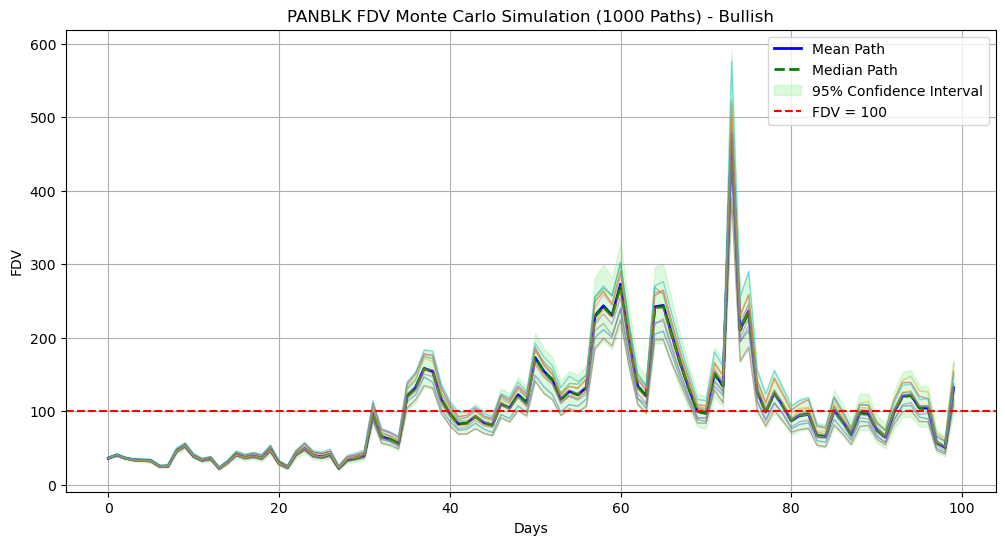

1% quantile:  22.32
5% quantile:  28.85
10% quantile: 33.66
90% quantile: 196.80
100 is at the 58.00th percentile in the median distribution.


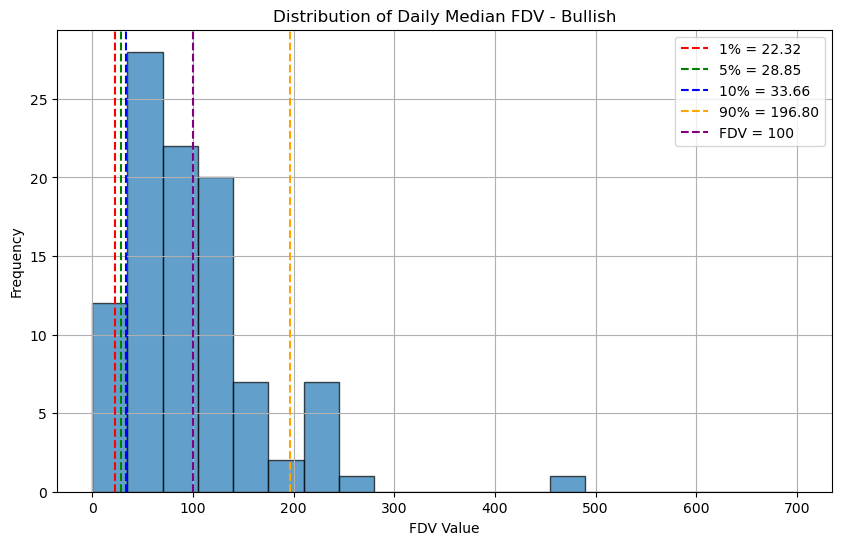

Percentage of FDV simulations exceeding 100 million on day 100: 75.50%
Scenario: Neutral
  Day 100 Mean FDV: 124.27
  Day 100 - 5th Percentile: 76.52
  Day 100 - 95th Percentile: 184.78



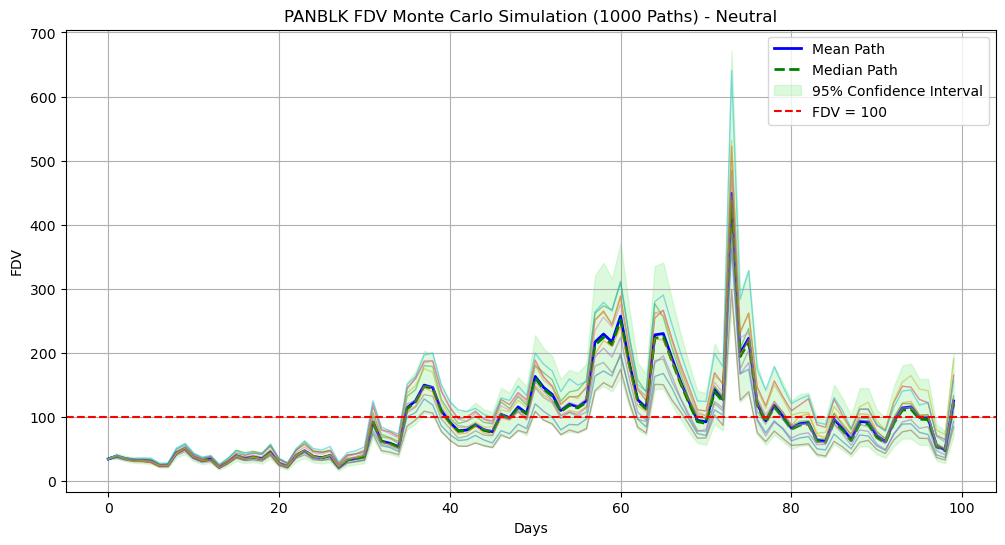

1% quantile:  20.90
5% quantile:  27.00
10% quantile: 31.63
90% quantile: 182.50
100 is at the 63.00th percentile in the median distribution.


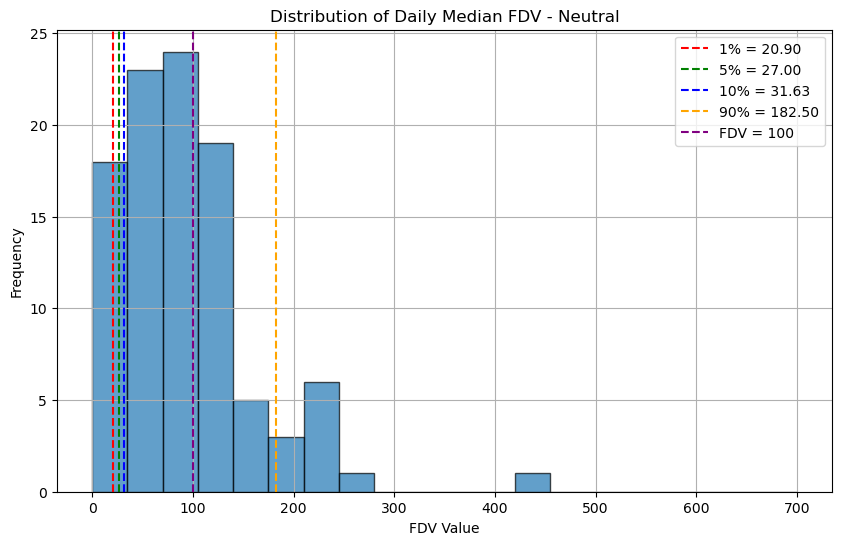

Percentage of FDV simulations exceeding 100 million on day 100: 36.60%
Scenario: Bearish
  Day 100 Mean FDV: 94.66
  Day 100 - 5th Percentile: 50.35
  Day 100 - 95th Percentile: 155.10



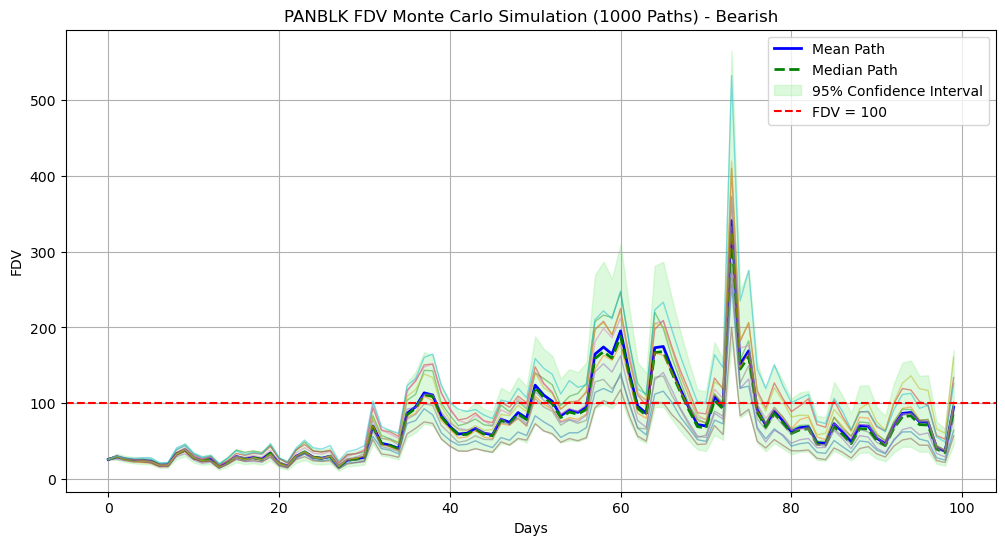

1% quantile:  15.83
5% quantile:  20.45
10% quantile: 24.05
90% quantile: 137.16
100 is at the 83.00th percentile in the median distribution.


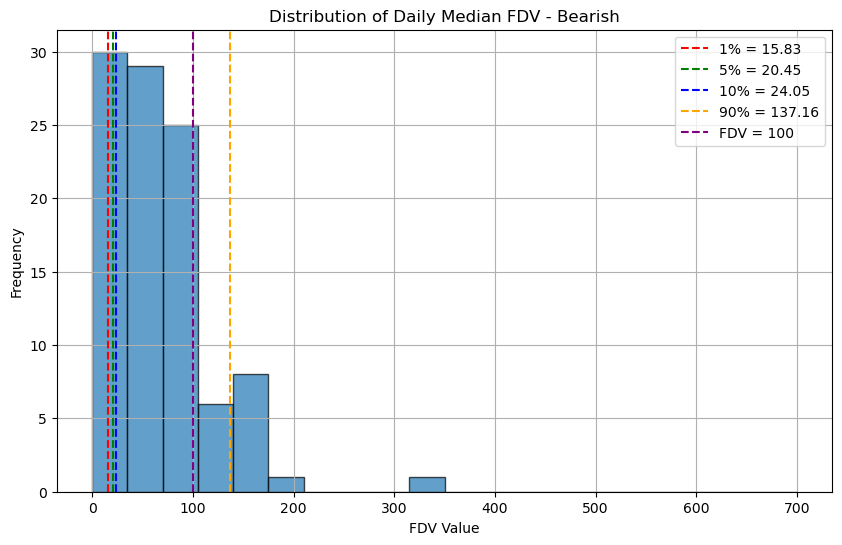

In [39]:
# Parameter Settings
# ====================
T_half = 50       # Transition period (days)
initial_FDV = 100  # Initial FDV
num_simulations = 1000
days = 100

# ====================
# Data Preparation
# ====================
# Assuming df contains historical data (Replace with actual data loading)
# Example: Read from CSV file (Ensure 'Volume' column and date index exist)
# df = pd.read_csv('usdt_volume.csv', index_col='Date', parse_dates=True)
last_100_days = df['Volume'].iloc[-100:]  # Extract last 100 days data
usdt_volume = last_100_days.values  # Convert to numpy array

# ====================
# Volatility Function
# ====================
def get_sigma(t, volatility_multiplier):
    """Calculate mixed volatility (annualized) on day t"""
    if t <= T_half:
        omega = 1 - (0.5 / T_half) * t
    else:
        omega = 0.5
    return (omega * sigma_aia + (1 - omega) * sigma_defi)*volatility_multiplier

# ====================
# Value Function
# ====================
def get_value(t, growth_rate_multiplier):
    """Calculate benchmark value on day t"""
    return (value_aia + value_defi * (1 if t >= T_half else 0))*growth_rate_multiplier

# ====================
# Monte Carlo Simulation
# ====================

for scenario_name, settings in scenarios.items():

    np.random.seed(42)  # Fix random seed for reproducibility
    paths = np.zeros((num_simulations, days))
    paths[:, 0] = initial_FDV

    for sim in range(num_simulations):
        for day in range(1, days):
            t = day - 1  # Current time index

            # Retrieve current parameters
            sigma = get_sigma(t, settings['volatility_multiplier'])
            curr_value = get_value(t, settings['growth_rate_multiplier'])
            next_value = get_value(t+1, settings['growth_rate_multiplier'])

            # Convert annualized volatility to daily volatility
            sigma_daily = sigma / np.sqrt(365)

            # Compute volatility term
            z = np.random.normal()
            drift = sigma_daily * z - 0.5 * sigma_daily**2

            # Update FDV
            volume_ratio = usdt_volume[day] / usdt_volume[day-1]
            value_ratio = next_value / curr_value
            paths[:, 0] = curr_value * np.exp(drift)
            paths[sim, day] = paths[sim, day-1] * volume_ratio * value_ratio * np.exp(drift)

    # ====================
    # Result Analysis
    # ====================
    # Compute statistics
    mean_path = np.mean(paths, axis=0)
    median_path = np.median(paths, axis=0)
    std_dev = np.std(paths, axis=0)

    # Compute percentage of simulations above 100 on day 100
    above_100_ratio = np.sum(paths[:, -1] > 100) / num_simulations
    print(f'Percentage of FDV simulations exceeding 100 million on day 100: {above_100_ratio:.2%}')

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mean_path, 'b', lw=2, label='Mean Path')
    plt.plot(median_path, 'g--', lw=2, label='Median Path')
    #plt.fill_between(range(days), mean_path - 2*std_dev, mean_path + 2*std_dev, alpha=0.1)

    # Confidence level
    pct2_5 = np.percentile(paths, 2.5, axis=0)  # 2.5% Percentile (Lower Bound)
    pct97_5 = np.percentile(paths, 97.5, axis=0)  # 97.5% Percentile (Upper Bound)

    # Day 100 specific stats
    day_100_values = paths[:, -1]
    day_100_mean = np.mean(day_100_values)
    day_100_p5 = np.percentile(day_100_values, 5)
    day_100_p95 = np.percentile(day_100_values, 95)

    plt.fill_between(range(days), pct2_5, pct97_5, color='lightgreen', alpha=0.3, label="95% Confidence Interval")

    print(f"Scenario: {scenario_name}")
    print(f"  Day 100 Mean FDV: {day_100_mean:.2f}")
    print(f"  Day 100 - 5th Percentile: {day_100_p5:.2f}")
    print(f"  Day 100 - 95th Percentile: {day_100_p95:.2f}\n")

    # Plot sample paths
    for i in range(10):  # Plot first 10 paths
        plt.plot(paths[i], lw=1, alpha=0.5)

    # Add horizontal line at 100
    plt.axhline(y=100, color='r', linestyle='--', label='FDV = 100')

    plt.title(f'PANBLK FDV Monte Carlo Simulation ({num_simulations} Paths) - {scenario_name}')
    plt.xlabel('Days')
    plt.ylabel('FDV')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 1. Calculate quantiles (1%, 5%, 10%), (90%)
    pct1 = np.percentile(median_path, 1)
    pct5 = np.percentile(median_path, 5)
    pct10 = np.percentile(median_path, 10)
    pct90 = np.percentile(median_path, 90)

    # 2. Find the percentile rank of 100 in median_path
    quantile_100 = percentileofscore(median_path, 100)

    # Print out the quantiles and percentile rank
    print(f"1% quantile:  {pct1:.2f}")
    print(f"5% quantile:  {pct5:.2f}")
    print(f"10% quantile: {pct10:.2f}")
    print(f"90% quantile: {pct90:.2f}")
    print(f"100 is at the {quantile_100:.2f}th percentile in the median distribution.")

    # 3. Plot the histogram of median_path
    bins = np.arange(0, 701, 35)  # from 0 to 700, step = 35
    plt.figure(figsize=(10, 6))
    plt.hist(median_path, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Daily Median FDV - {scenario_name}')
    plt.xlabel("FDV Value")
    plt.ylabel("Frequency")

    # 4. Annotate vertical lines for 1%, 5%, 10% quantiles and the value 100
    plt.axvline(x=pct1,  color='red',   linestyle='--', label=f'1% = {pct1:.2f}')
    plt.axvline(x=pct5,  color='green', linestyle='--', label=f'5% = {pct5:.2f}')
    plt.axvline(x=pct10, color='blue',  linestyle='--', label=f'10% = {pct10:.2f}')
    plt.axvline(x=pct90, color='orange',  linestyle='--', label=f'90% = {pct90:.2f}')
    plt.axvline(x=100,   color='purple',linestyle='--', label='FDV = 100')

    # 5. Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()


# If we incorporate DeFi part into PANBLK valuation at the 60th day

In [40]:
def compute_w_scenarios(df, unsuc_tokens, all_tokens):
    """
    Compute the weight W for unsuccessful tokens, incorporating:
    - Historical volatility
    - Risk premium (Risk Premium)
    - Maximum drawdown (Max Drawdown)

    :param df: DataFrame containing historical price data of all tokens
    :param unsuc_tokens: List of unsuccessful tokens
    :param all_tokens: List of all market tokens (ai_agents + defi_tokens)
    :return: (optimistic_W, neutral_W, pessimistic_W)
    """
    # **Convert set to list**
    unsuc_tokens = list(unsuc_tokens)
    all_tokens = list(all_tokens)

    # Compute daily returns for unsuccessful tokens and the overall market
    returns_unsuc = df[unsuc_tokens].pct_change()
    returns_market = df[all_tokens].pct_change()

    # Compute annualized volatility for unsuccessful tokens
    sigma_unsuc = returns_unsuc.std().mean() * np.sqrt(252)
    sigma_market = returns_market.std().mean() * np.sqrt(252)

    # **Compute risk premium (Risk Premium)**
    if sigma_market > 0:
        risk_premium = np.log(1 + sigma_unsuc / sigma_market)  # Apply log transformation to smooth data
    else:
        risk_premium = 0

    # **Compute market maximum drawdown (Max Drawdown)**
    market_prices = df[all_tokens].mean(axis=1)  # Compute market average price
    peak = market_prices.cummax()  # Compute historical peak
    drawdown = (peak - market_prices) / peak  # Compute drawdown percentage
    max_drawdown = drawdown.max()  # Extract maximum drawdown value

    # **Compute W under different market scenarios**
    neutral_w = risk_premium  # Baseline market risk level

    # Pessimistic W: Greater impact of unsuccessful tokens during extreme market conditions
    pessimistic_w = neutral_w * (1 + max_drawdown)

    # Optimistic W: Lower impact of unsuccessful tokens in favorable market conditions
    optimistic_w = neutral_w * (1 - max_drawdown)

    # **Ensure W does not drop below 0**
    optimistic_w = max(optimistic_w, 0)
    neutral_w = max(neutral_w, 0)
    pessimistic_w = max(pessimistic_w, 0)

    return optimistic_w, neutral_w, pessimistic_w

def normalize_w_minmax(optimistic_w, neutral_w, pessimistic_w, min_val=0.1, max_val=0.5):
    """
    Normalize W to the range [0.1, 0.5], preserving market information while preventing excessive impact.
    """
    W_values = np.array([optimistic_w, neutral_w, pessimistic_w])
    
    # Compute Min-Max range
    W_min, W_max = W_values.min(), W_values.max()

    # Prevent division by zero
    if W_max - W_min == 0:
        return min_val, (min_val + max_val) / 2, max_val  # Fallback to ensure distinction

    # Min-Max normalization to [min_val, max_val]
    W_normalized = min_val + (W_values - W_min) * (max_val - min_val) / (W_max - W_min)
    
    return tuple(W_normalized)

# **Compute W based on market conditions**
optimistic_W, neutral_W, pessimistic_W = compute_w_scenarios(df, list(unsuc), list(ai_agents | defi_tokens))

print(f"Optimistic W: {optimistic_W:.2f}")
print(f"Neutral W: {neutral_W:.2f}")
print(f"Pessimistic W: {pessimistic_W:.2f}")

# **Apply Min-Max normalization to scale W to [0.1, 0.5]**
optimistic_W, neutral_W, pessimistic_W = normalize_w_minmax(optimistic_W, neutral_W, pessimistic_W)

print(f"\nNormalized Optimistic W: {optimistic_W:.2f}")
print(f"Normalized Neutral W: {neutral_W:.2f}")
print(f"Normalized Pessimistic W: {pessimistic_W:.2f}")

Optimistic W: 0.67
Neutral W: 1.30
Pessimistic W: 1.94

Normalized Optimistic W: 0.10
Normalized Neutral W: 0.30
Normalized Pessimistic W: 0.50
